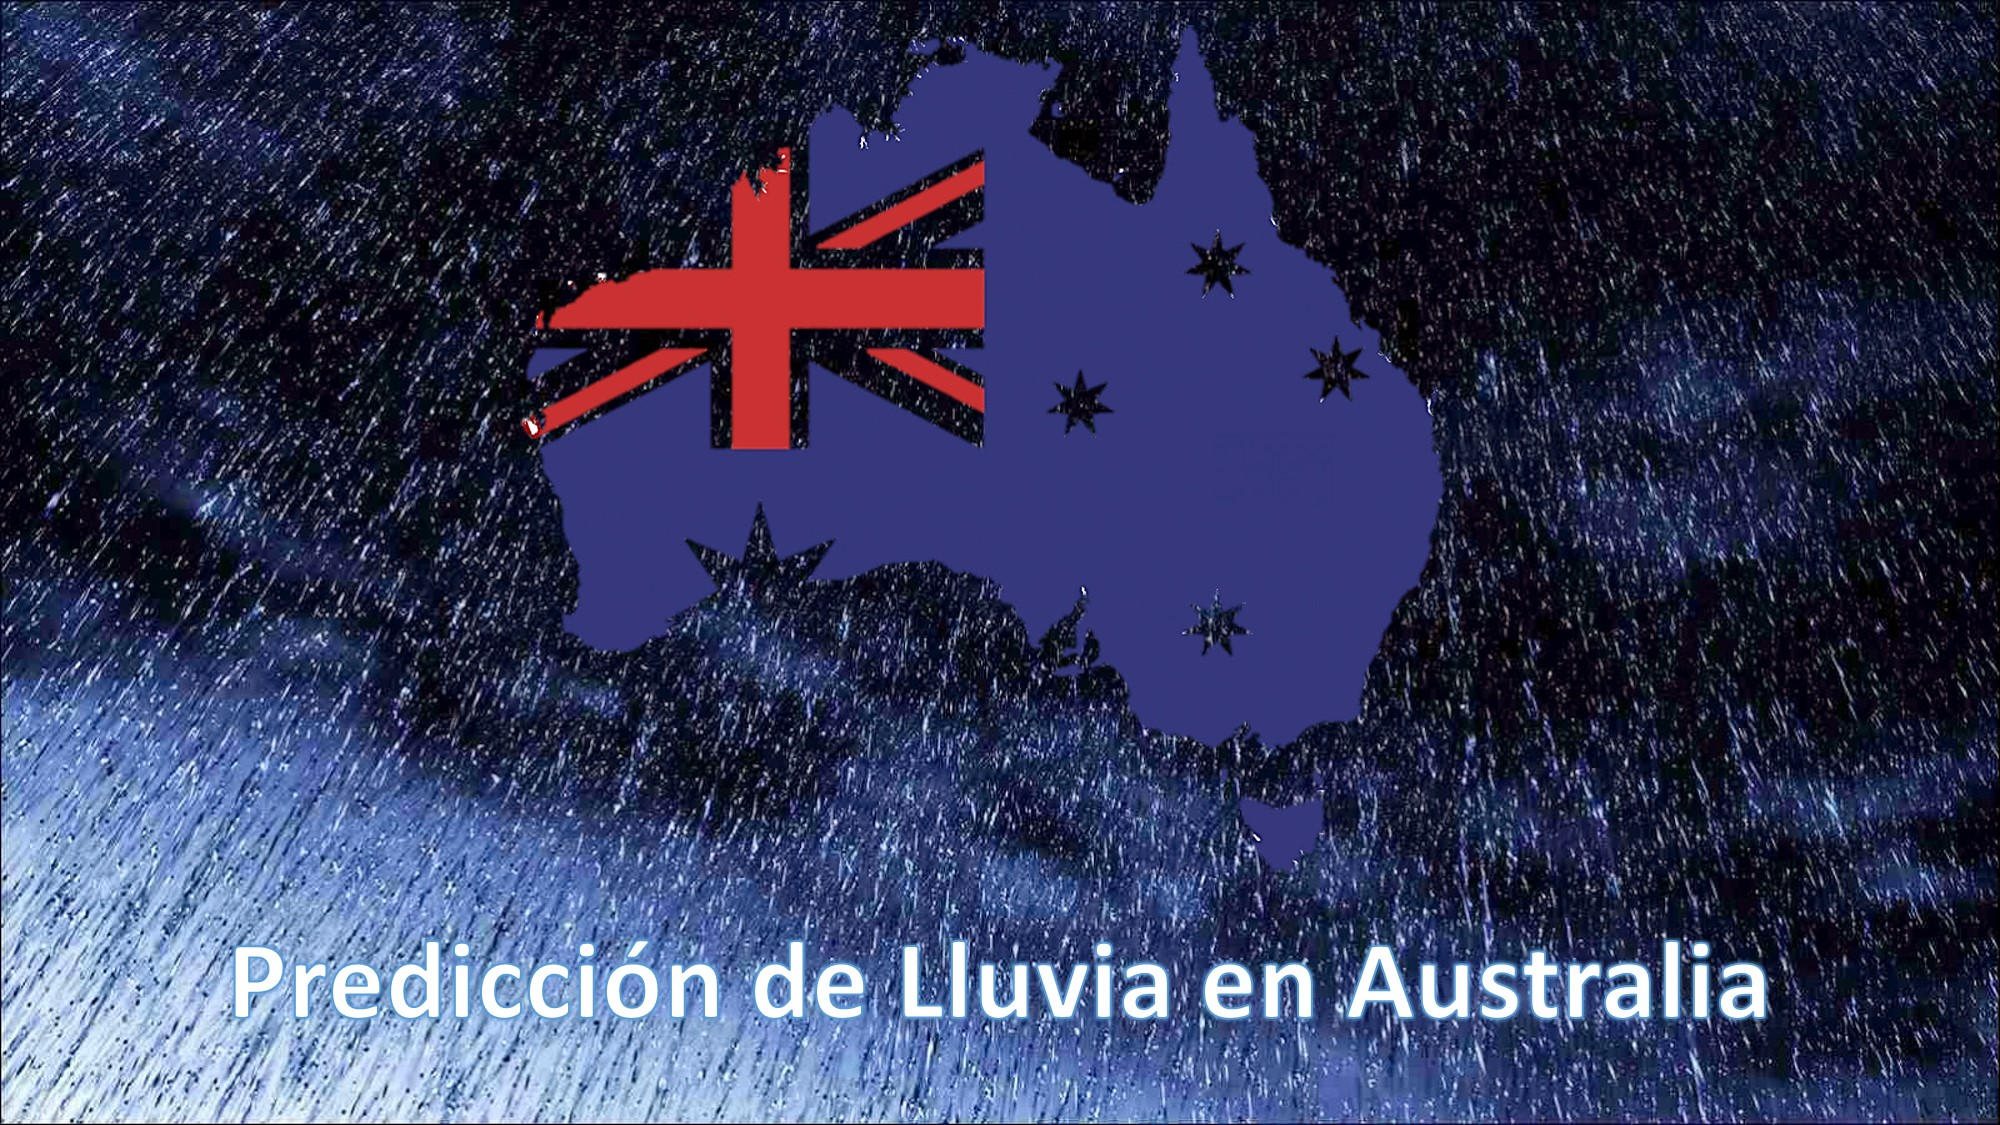

#**INTRODUCCIÓN**


El clima de Australia varía ampliamente, aunque la mayor parte de Australia es desértico o semiárido (40% del territorio está cubierto por médanos), sólo las esquinas sudestes y sudoestes tienen un clima templado y de suelos moderadamente fértiles. La parte norte del país tiene un clima tropical: parte es bosque lluvioso tropical, parte pastizales, y parte desiertos.

La lluvia es altamente variable, con frecuentes sequías, Los patrones de lluvias a través de Australia son altamente estacionales. Comparado con otras masas continentales, Australia es muy seco. Más del 80 % del continente tienen lluvias anuales menores a 600 mm, solo la Antártida recibe menos que Australia.

El dataset proporcionado a continuación, contiene una amplia gama de variables climáticas, como la temperatura mínima y máxima, la lluvia, la evaporación, la radiación solar, la dirección y velocidad del viento, la humedad, la presión atmosférica, la cobertura de nubes y más, que permite explorar patrones climáticos y realizar predicciones sobre la probabilidad de lluvia. Así, con un enfoque en la variable "RainTomorrow", que indica si lloverá al día siguiente, investigaremos la relación entre las diferentes variables climáticas y se desarrollarán modelos predictivos usando técnicas de aprendizaje automático supervisado con algoritmos de clasificación.

La comprensión de estos datos puede contribuir a la toma de decisiones informadas en áreas como la agricultura, la gestión de recursos hídricos y la planificación urbana en Australia.



**OBJETIVO:** Predecir si lloverá al día siguiente en las diferentes regiones de Australia utilizando modelos de Machine Learning.

**CONTEXTO COMERCIAL:** Dada las características climáticas de australia, y la importancia de las precipitaciones en las regiones, para la agricultura y la silvicultura, así como también en la gestión del agua para uso comercial y residencial, además del impacto que tienen en las actividades realizadas por el público en general. El departamento meteorológico Australiano, trata de pronosticar de manera precisa si lloverá o no, para facilitar la planificación y preparación de manera activa,ante eventos de lluvias o falta de las mismas.



**CONTEXTO ANALÍTICO:** Se proporciona un archivo .CSV, que contiene aproximadamente 10 años  de observaciones meteorológicas diarias desde muchos lugares de Australia (Oct 2007-Jun 2017). El conjunto de datos cuenta con una amplia gama de variables climáticas, como la temperatura mínima y máxima, la lluvia, la evaporación, la radiación solar, la dirección y velocidad del viento, la humedad, la presión atmosférica, la cobertura de nubes y más, que permiten explorar patrones climáticos y realizar predicciones sobre la probabilidad de lluvia. El delimitador en el archivo .CSV dado es “;”.Con la variable objetivo "RainTomorrow",que indica si lloverá al día siguiente y los otros factores climáticos, se desarrollarán modelos predictivos usando técnicas de aprendizaje automático supervisado con algoritmos de clasificación Binario.




**PREGUNTAS DE INTERÉS:** Durante el análisis de los datos se intentará contestar lo siguiente:


* ¿Cómo es la distribución cantidad de lluvia promedio(mm) en australia por ubicación geográfica?
* ¿Existe una temporada específica del año en la que es más probable que llueva?
* ¿Hay alguna correlación entre la cantidad de lluvia(mm) y la humedad del viento?
*   ¿La dirección del viento por la mañana afecta la probabilidad de lluvia al día siguiente?
* ¿La presión atmosférica a las 9 am tiene alguna relación con la probabilidad de lluvia al día siguiente?










# **DATA ACQUISITION**

1. IMPORTANDO LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

2. CARGAR BASE DE DATOS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_weather= pd.read_csv('/content/drive/MyDrive/pre-entregas data science/Datasets iniciales/weatherAUS.csv', sep =';' ) #Lectura del archivo .csv para cargar en el notebook
df_weather

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       1-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1       2-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2       3-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3       4-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4       5-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455  21-6-2017    Uluru      2.8     23.4       0.0          NaN       NaN   
145456  22-6-2017    Uluru      3.6     25.3       0.0          NaN       NaN   
145457  23-6-2017    Uluru      5.4     26.9       0.0          NaN       NaN   
145458  24-6-2017    Uluru      7.8     27.0       0.0          NaN       NaN   
145459  25-6-2017    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   
145459         NaN            NaN        ESE  ...        62.0         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  
145459         No           NaN  

[145460 rows x 23 columns]

3. DESCRIPCIÓN DE VARIABLES




Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias de muchos lugares de Australia.

RainTomorrow es la variable de destino para predecir. Significa: ¿llovió al día siguiente, sí o no? Esta columna es Sí si la lluvia de ese día fue de 1 mm o más.

**Fecha** (date):

**Ubicación** (location): Nombre de la ciudad de Australia.

**MinTemp**: La temperatura mínima durante un día en particular. (grados Celsius)

**MaxTemp**: La temperatura máxima durante un día en particular. (grado Celsius)

**Lluvia** (Rainfall): Lluvia durante un día en particular. (milímetros)

**Evaporación** (Evaporation): Evaporación durante un día en particular. (milímetros)

**Sol** (Sunshine): Sol brillante durante un día en particular. (horas)

**WindGusDir**: La dirección de la ráfaga más fuerte durante un día en particular. (16 puntos de la brújula)

**WindGuSpeed**: Velocidad de la ráfaga más fuerte durante un día en particular. (kilómetros por hora)

**WindDir9am**: La dirección del viento durante 10 min antes de las 9 am. (puntos de la brújula)

**WindDir3pm**: La dirección del viento durante 10 min antes de las 3 pm. (puntos de la brújula)

**WindSpeed9am**: Velocidad del viento durante 10 min antes de las 9 am. (kilómetros por hora)

**WindSpeed3pm**: Velocidad del viento durante 10 min antes de las 3 pm. (kilómetros por hora)

**Humidity9am**: La humedad del viento a las 9 am. (porcentaje)

**Humidity3pm**: La humedad del viento a las 3 pm. (porcentaje)

**Presión9am**: Presión atmosférica a las 9 am. (hectopascales)

**Presión3pm**: Presión atmosférica a las 3 pm. (hectopascales)

**Cloud9am**: Partes del cielo oscurecidas por nubes a las 9 am. (octavos)

**Cloud3pm**: Partes del cielo oscurecidas por nubes a las 3 p. m. (octavos)

**Temp9am**: La temperatura a las 9 am. (grado Celsius)

**Temp3pm**: La temperatura a las 3 pm. (grados Celsius)

**RainToday**: si hoy llueve, entonces 'Sí'. Si hoy no llueve entonces 'No'.

**RainTomorrow**: si mañana llueve, entonces (Sí). Si mañana no llueve entonces (No).




# **EDA**

1. TAMAÑO DEL DATASET

In [ ]:
df_weather.shape

(145460, 23)

**Comentario:** El dataset consta de 145460 filas y 23 columnas

2. COLUMNAS

In [ ]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

3. TIPO DE DATOS

In [ ]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**Comentario:**
*   La data incluye variables numéricas y categóricas

*   La columna Date que se refiere a la fecha, es de formato Object, por lo que hay que llevarla a formato de fecha.

In [ ]:
df_weather.head() # Primeras 5 filas del dataset

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  1-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  2-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  3-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  4-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  5-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

4. CONVIRTIENDO LA COLUMNA DATE A FORMATO DE FECHA

In [ ]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

<ipython-input-9-30efe21bf1f9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_weather['Date'] = pd.to_datetime(df_weather['Date'])


In [ ]:
# extrayendo anio, mes y día de la fecha

df_weather['Year'] = df_weather['Date'].dt.year
df_weather['Month'] = df_weather['Date'].dt.month
df_weather['Day'] = df_weather['Date'].dt.day
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
# eliminando la columna original de fecha

df_weather.drop('Date', axis=1, inplace = True)

5. PRIMERAS 5 FILAS

In [ ]:
df_weather.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008      1   12  
1     17.2     24.3         No            No  2008      2   12  
2     21.0     23.2         No            No  2008      3   12  
3     18.1     26.5         No            No  2008      4   12  
4     17.8     29.7         No            No  2008      5   12  

[5 rows x 25 columns]

6. ÚLTIMAS 5 FILAS


In [ ]:
df_weather.tail() # Últimas 5 filas del dataset

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
145455           E           31.0         SE        ENE  ...       1020.3   
145456         NNW           22.0         SE          N  ...       1019.1   
145457           N           37.0         SE        WNW  ...       1016.8   
145458          SE           28.0        SSE          N  ...       1016.5   
145459         NaN            NaN        ESE        ESE  ...       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
145455       NaN       NaN     10.1     22.4         No            No  2017   
145456       NaN       NaN     10.9     24.5         No            No  2017   
145457       NaN       NaN     12.5     26.1         No            No  2017   
145458       3.0       2.0     15.1     26.0         No            No  2017   
145459       8.0       8.0     15.0     20.9         No           NaN  2017   

        Month  Day  
145455      6   21  
145456      6   22  
145457      6   23  
145458      6   24  
145459      6   25  

[5 rows x 25 columns]

**Comentario:** Ahora tenemos 25 columnas, con las columnas agregadas de anio, mes y día.

##EXPLORANDO VALORES NUMÉRICOS

In [ ]:
df_weathercopia = df_weather.copy() # Creando una copia del dataset para realizar todas las modificaciones sobre la copia

In [ ]:
numericos = [var for var in df_weathercopia.columns if df_weathercopia[var].dtype!='O'] # Lista de variables numéricas

#Imprimir el número de variables numéricas y sus nombres

print('Hay {} Variables Numéricas\n'.format(len(numericos)))

print('Las Variables Numéricas son :', numericos)


Hay 19 Variables Numéricas

Las Variables Numéricas son : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
df_weathercopia[numericos].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008      1   12  
1       1007.8       NaN       NaN     17.2     24.3  2008      2   12  
2       1008.7       NaN       2.0     21.0     23.2  2008      3   12  
3       1012.8       NaN       NaN     18.1     26.5  2008      4   12  
4       1006.0       7.0       8.0     17.8     29.7  2008      5   12

###EXPLORANDO OUTLIERS

In [ ]:
df_weathercopia.describe(percentiles = [0.01, 0.1, .15, 0.25, 0.75, 0.9, 0.99]).T #Matriz de estadísticos

count         mean          std     min      1%     10%  \
MinTemp        143975.0    12.194034     6.398495    -8.5    -1.9     4.0   
MaxTemp        144199.0    23.221348     7.119049    -4.8     9.0    14.5   
Rainfall       142199.0     2.360918     8.478060     0.0     0.0     0.0   
Evaporation     82670.0     5.468232     4.193704     0.0     0.4     1.4   
Sunshine        75625.0     7.611178     3.785483     0.0     0.0     1.5   
WindGustSpeed  135197.0    40.035230    13.607062     6.0    15.0    24.0   
WindSpeed9am   143693.0    14.043426     8.915375     0.0     0.0     4.0   
WindSpeed3pm   142398.0    18.662657     8.809800     0.0     2.0     9.0   
Humidity9am    142806.0    68.880831    19.029164     0.0    18.0    44.0   
Humidity3pm    140953.0    51.539116    20.795902     0.0     9.0    23.0   
Pressure9am    130395.0  1017.649940     7.106530   980.5  1000.2  1008.8   
Pressure3pm    130432.0  1030.775897  3963.418237   977.1   998.5  1006.4   
Cloud9am        89572.0     4.447461     2.887159     0.0     0.0     1.0   
Cloud3pm        86102.0     4.509930     2.720357     0.0     0.0     1.0   
Temp9am        143693.0    16.990631     6.488753    -7.2     2.6     8.9   
Temp3pm        141851.0    21.683390     6.936650    -5.4     7.6    13.2   
Year           145460.0  2012.769751     2.537684  2007.0  2008.0  2009.0   
Month          145460.0     6.447216     3.437489     1.0     1.0     2.0   
Day            145460.0    15.664657     8.840823     1.0     1.0     3.0   

                  15%     25%     50%     75%     90%     99%        max  
MinTemp           5.4     7.6    12.0    16.9    20.8    25.8       33.9  
MaxTemp          15.8    17.9    22.6    28.2    32.9    40.1       48.1  
Rainfall          0.0     0.0     0.0     0.8     6.2    37.4      371.0  
Evaporation       1.8     2.6     4.8     7.4    10.2    18.4      145.0  
Sunshine          2.7     4.8     8.4    10.6    12.1    13.4       14.5  
WindGustSpeed    28.0    31.0    39.0    48.0    57.0    81.0      135.0  
WindSpeed9am      6.0     7.0    13.0    19.0    26.0    39.0      130.0  
WindSpeed3pm      9.0    13.0    19.0    24.0    30.0    43.0       87.0  
Humidity9am      50.0    57.0    70.0    83.0    94.0   100.0      100.0  
Humidity3pm      28.0    37.0    52.0    66.0    79.0    98.0      100.0  
Pressure9am    1010.5  1012.9  1017.6  1022.4  1026.7  1034.0     1041.0  
Pressure3pm    1008.0  1010.4  1015.2  1020.0  1024.3  1031.6  1016777.0  
Cloud9am          1.0     1.0     5.0     7.0     8.0     8.0        9.0  
Cloud3pm          1.0     2.0     5.0     7.0     8.0     8.0        9.0  
Temp9am          10.2    12.3    16.7    21.6    25.9    31.2       40.2  
Temp3pm          14.5    16.6    21.1    26.4    31.2    38.5       46.7  
Year           2010.0  2011.0  2013.0  2015.0  2016.0  2017.0     2017.0  
Month             2.0     3.0     6.0     9.0    11.0    12.0       12.0  
Day               5.0     8.0    16.0    23.0    28.0    31.0       31.0

1. VISUALIZANDO OUTLIERS

<Figure size 5000x3000 with 0 Axes>

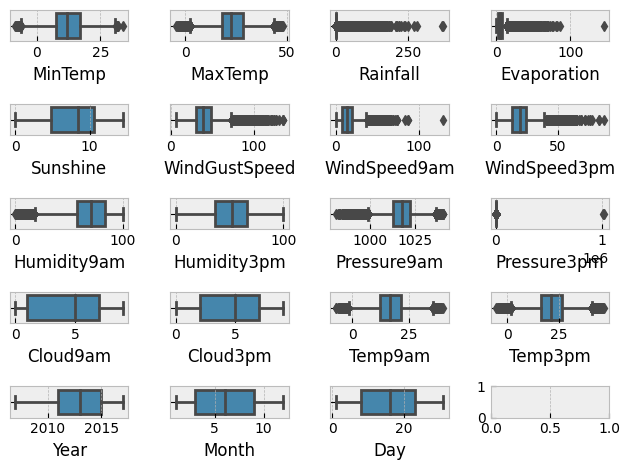

In [ ]:
df_numericas= df_weathercopia[numericos] # Seleccionando las variables numéricas del DataFrame

plt.figure(figsize=(50,30)) # Configuración del tamaño de la figura

names = list(df_numericas.columns) # Obtener los nombres de las columnas numéricas
f, axes = plt.subplots(round(len(names)/4), 4) # Creación de  subgráficos (cuadrícula de gráficos de caja)
y = 0; # Inicialización de la variable de control de posición en la cuadrícula

# Iteración sobre los nombres de las columnas numéricas y dibujo gráficos de caja
for name in names:
    i, j = divmod(y, 4) # Calcula la posición en la cuadrícula
    sns.boxplot(x=df_numericas[name], ax=axes[i, j]) # Dibuja el gráfico de caja para la columna actual en la posición i, j
    y = y + 1 # Incrementa la variable de posición

plt.tight_layout() # Ajusta el diseño para mejorar la presentación
plt.show() #Mostrar la figura



**Comentario:** Se puede observar que las variables 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', contienen datos atípicos, siendo algunas de ellas bastante críticas en cuanto a cantidad, Rainfall y evaporation por ejemplo, también la variable pressure 3pm presenta un valor bastante alejado del rango normal de datos.


2. DISTRIBUCIONES DE FRECUENCIA

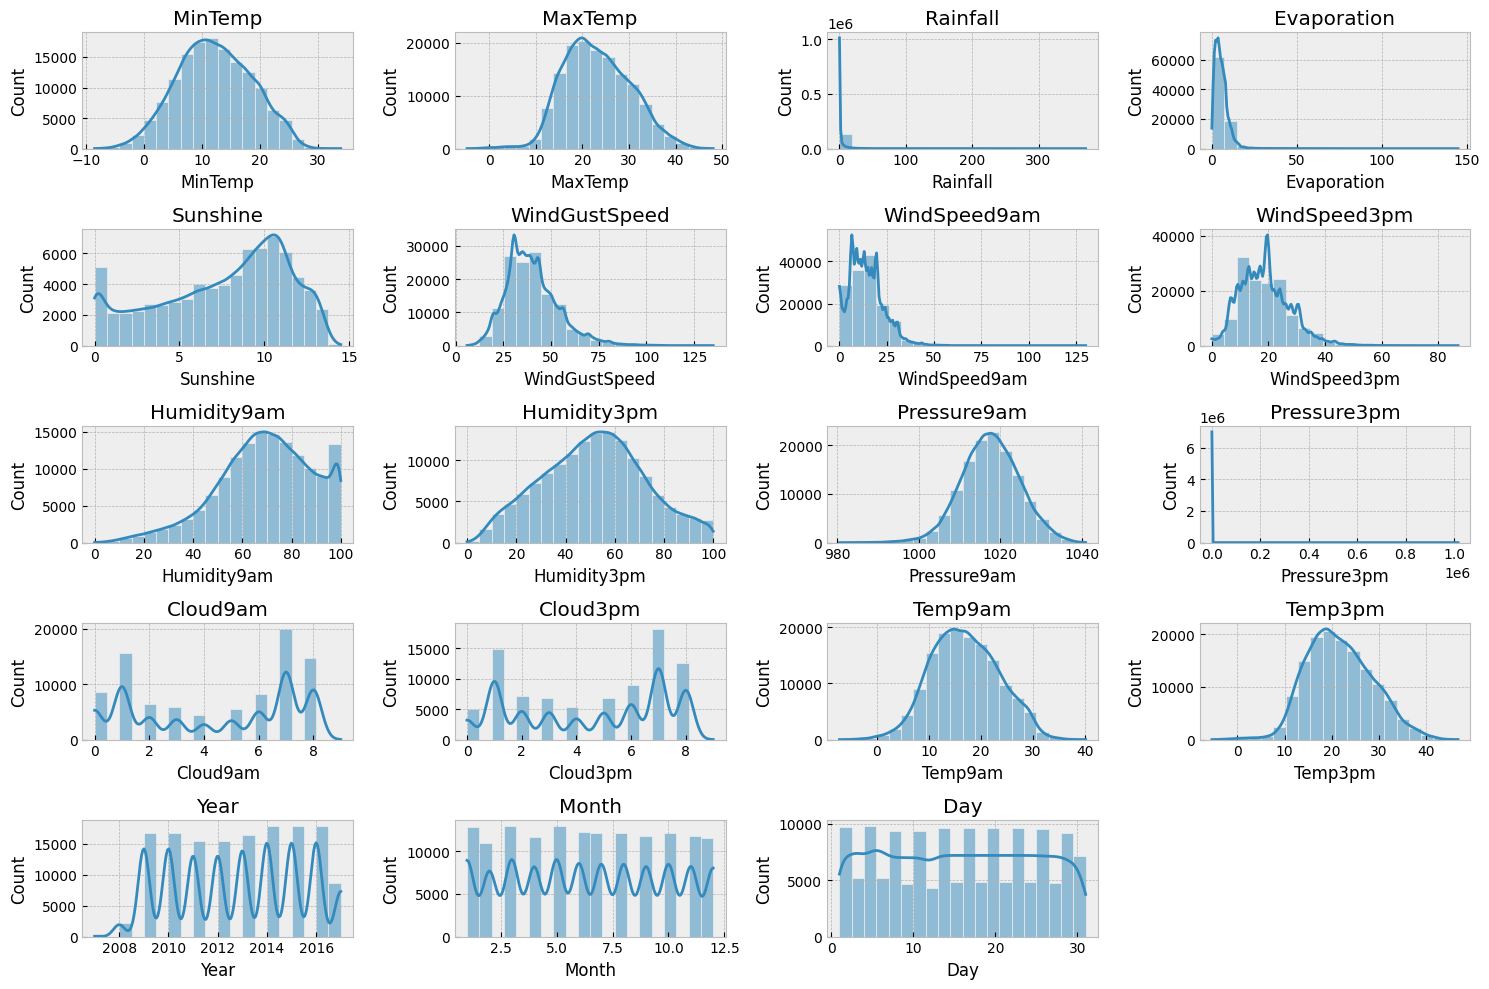

In [ ]:
plt.figure(figsize=(15, 10)) #Configuración del tamaño de la figura

# Número de columnas en la cuadrícula
num_columnas = 4

# Número de filas necesario
num_filas = int(np.ceil(len(numericos) / num_columnas))

# Crear subgráficos
for i, variable in enumerate(numericos, 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.histplot(df_numericas[variable], kde=True, bins=20)
    plt.title(variable)

# Ajusta el espaciado
plt.tight_layout()

# Muestra el gráfico
plt.show()

**Comentario:** Se observan distribuciones simétricas para algunas de las variables. Sunshine, Humidity9pm, WindSpeed9am, se encuentran sesgadas por ejemplo, y mas aun las distribuciones de variales con muchos outliers, tales como Rainfall y Evaporation.

3. MANEJO DE OUTLIERS

**Comentario:** Para tratar los outliers de las variables se utilizará la técnica de capping para conservar la mayor cantidad de datos y se emplearan los percentiles 0.01 como límite inferior y 0.99 como límite superior para abarcar el mayor rango de datos.

In [ ]:
# Definir percentiles
lower_percentile = 0.01
upper_percentile = 0.99

# Aplicar capping a cada variable
for var in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']:
    # Calculo de límites inferiores y superiores para capping
    lower_limit = df_weathercopia[var].quantile(lower_percentile)
    upper_limit = df_weathercopia[var].quantile(upper_percentile)

    # Aplicar capping: si el valor es menor que el límite inferior, establecerlo en el límite inferior
    df_weathercopia[var] = np.where(df_weathercopia[var] < lower_limit, lower_limit, df_weathercopia[var])
    # Aplicar capping: si el valor es mayor que el límite superior, establecerlo en el límite superior
    df_weathercopia[var] = np.where(df_weathercopia[var] > upper_limit, upper_limit, df_weathercopia[var])


>  3.1 VISUALIZACIÓN LUEGO DEL CAPPING



<Figure size 5000x3000 with 0 Axes>

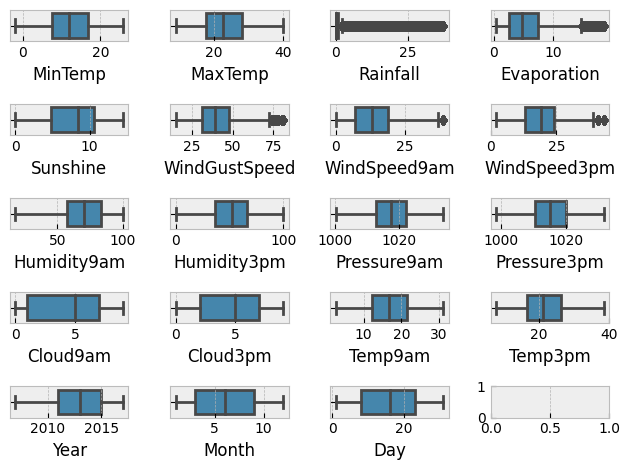

In [ ]:
df_numericas= df_weathercopia[numericos]

plt.figure(figsize=(50,30))

names = list(df_numericas.columns)
f, axes = plt.subplots(round(len(names)/4), 4)
y = 0;
for name in names:
    i, j = divmod(y, 4)
    sns.boxplot(x=df_numericas[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()


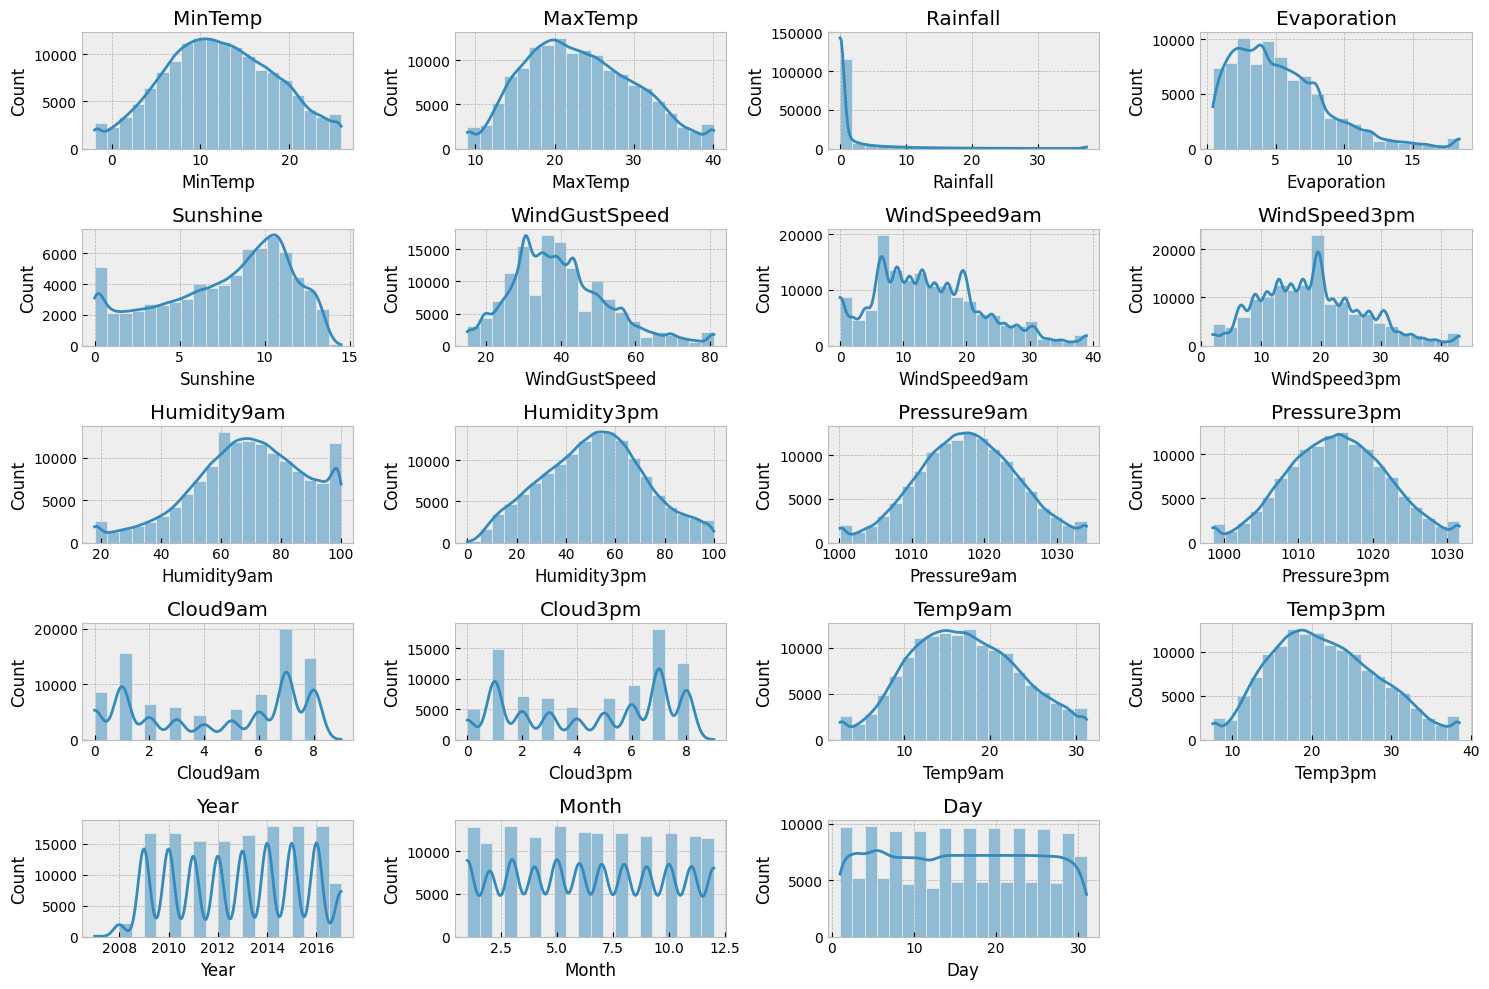

In [ ]:
df_numericas= df_weathercopia[numericos]

plt.figure(figsize=(15, 10))

num_columnas = 4

num_filas = int(np.ceil(len(numericos) / num_columnas))

for i, variable in enumerate(numericos, 1):
    plt.subplot(num_filas, num_columnas, i)
    sns.histplot(df_numericas[variable], kde=True, bins=20)
    plt.title(variable)

plt.tight_layout()
plt.show()

In [ ]:
df_weathercopia.describe(percentiles = [0.01, 0.1, .15, 0.25, 0.75, 0.9, 0.99]).T #Matriz de estadísticos

count         mean        std     min      1%     10%  \
MinTemp        143975.0    12.198885   6.338963    -1.9    -1.9     4.0   
MaxTemp        144199.0    23.244050   6.972266     9.0     9.0    14.5   
Rainfall       142199.0     2.092675   5.881222     0.0     0.0     0.0   
Evaporation     82670.0     5.379554   3.595559     0.4     0.4     1.4   
Sunshine        75625.0     7.611178   3.785483     0.0     0.0     1.5   
WindGustSpeed  135197.0    39.971752  13.267003    15.0    15.0    24.0   
WindSpeed9am   143693.0    13.976603   8.678115     0.0     0.0     4.0   
WindSpeed3pm   142398.0    18.624861   8.594937     2.0     2.0     9.0   
Humidity9am    142806.0    68.933567  18.876608    18.0    18.0    44.0   
Humidity3pm    140953.0    51.539116  20.795902     0.0     9.0    23.0   
Pressure9am    130395.0  1017.668282   6.954984  1000.2  1000.2  1008.8   
Pressure3pm    130432.0  1015.272816   6.893055   998.5   998.5  1006.4   
Cloud9am        89572.0     4.447461   2.887159     0.0     0.0     1.0   
Cloud3pm        86102.0     4.509930   2.720357     0.0     0.0     1.0   
Temp9am        143693.0    16.995433   6.395211     2.6     2.6     8.9   
Temp3pm        141851.0    21.703798   6.794189     7.6     7.6    13.2   
Year           145460.0  2012.769751   2.537684  2007.0  2008.0  2009.0   
Month          145460.0     6.447216   3.437489     1.0     1.0     2.0   
Day            145460.0    15.664657   8.840823     1.0     1.0     3.0   

                  15%     25%     50%     75%     90%     99%     max  
MinTemp           5.4     7.6    12.0    16.9    20.8    25.8    25.8  
MaxTemp          15.8    17.9    22.6    28.2    32.9    40.1    40.1  
Rainfall          0.0     0.0     0.0     0.8     6.2    37.4    37.4  
Evaporation       1.8     2.6     4.8     7.4    10.2    18.4    18.4  
Sunshine          2.7     4.8     8.4    10.6    12.1    13.4    14.5  
WindGustSpeed    28.0    31.0    39.0    48.0    57.0    81.0    81.0  
WindSpeed9am      6.0     7.0    13.0    19.0    26.0    39.0    39.0  
WindSpeed3pm      9.0    13.0    19.0    24.0    30.0    43.0    43.0  
Humidity9am      50.0    57.0    70.0    83.0    94.0   100.0   100.0  
Humidity3pm      28.0    37.0    52.0    66.0    79.0    98.0   100.0  
Pressure9am    1010.5  1012.9  1017.6  1022.4  1026.7  1034.0  1034.0  
Pressure3pm    1008.0  1010.4  1015.2  1020.0  1024.3  1031.6  1031.6  
Cloud9am          1.0     1.0     5.0     7.0     8.0     8.0     9.0  
Cloud3pm          1.0     2.0     5.0     7.0     8.0     8.0     9.0  
Temp9am          10.2    12.3    16.7    21.6    25.9    31.2    31.2  
Temp3pm          14.5    16.6    21.1    26.4    31.2    38.5    38.5  
Year           2010.0  2011.0  2013.0  2015.0  2016.0  2017.0  2017.0  
Month             2.0     3.0     6.0     9.0    11.0    12.0    12.0  
Day               5.0     8.0    16.0    23.0    28.0    31.0    31.0

###EXPLORANDO VALORES NULOS

In [ ]:
df_weathercopia[numericos].isnull().sum() # conteo de nulos por columna

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
df_weathercopia[numericos].isnull().mean() * 100 # Porcentaje de nulos en los valores numéricos

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustSpeed     7.055548
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

**Comentario:** Hay un porcentaje relativamente bajo de valores perdidos en los datos numéricos, por lo que mantendré las columnas para el análisis, y utilizaré métodos de imputación para reemplazar los valores perdidos considerando que son valores faltantes aleatorios (MAR).

In [ ]:
# Reemplazo de valores
for i in numericos:
    df_weathercopia[i].fillna(df_weathercopia[i].mean(), inplace=True)

**Comentario:** Los valores faltantes fueron reemplazados por la Media

In [ ]:
df_weathercopia.select_dtypes('number').isnull().sum() # verificando los valores nulos luego de la imputación

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
df_weathercopia.duplicated().sum() # Revisión de duplicados

0

**Comentario:** El dataset no tiene filas duplicadas

###MATRIZ DE CORRELACION

In [ ]:
cor= df_weathercopia.corr()
print (cor)

<ipython-input-29-21cf51a26777>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= df_weathercopia.corr()


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.732057  0.105228     0.395765  0.051433   
MaxTemp        0.732057  1.000000 -0.112108     0.494950  0.333812   
Rainfall       0.105228 -0.112108  1.000000    -0.069038 -0.194035   
Evaporation    0.395765  0.494950 -0.069038     1.000000  0.328369   
Sunshine       0.051433  0.333812 -0.194035     0.328369  1.000000   
WindGustSpeed  0.175267  0.071810  0.143817     0.165831 -0.022370   
WindSpeed9am   0.176436  0.018181  0.093017     0.155287  0.006041   
WindSpeed3pm   0.175908  0.051040  0.064028     0.109010  0.039794   
Humidity9am   -0.229844 -0.496898  0.272390    -0.413328 -0.349320   
Humidity3pm    0.007600 -0.495637  0.300111    -0.314384 -0.443121   
Pressure9am   -0.431255 -0.320437 -0.182588    -0.243361  0.029551   
Pressure3pm   -0.440619 -0.410445 -0.129503    -0.264995 -0.017723   
Cloud9am       0.062200 -0.228123  0.202705    -0.165135 -0.532497   
Cloud3pm       0.016

<ipython-input-30-53c2d7932ab3>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor, dtype=np.bool))


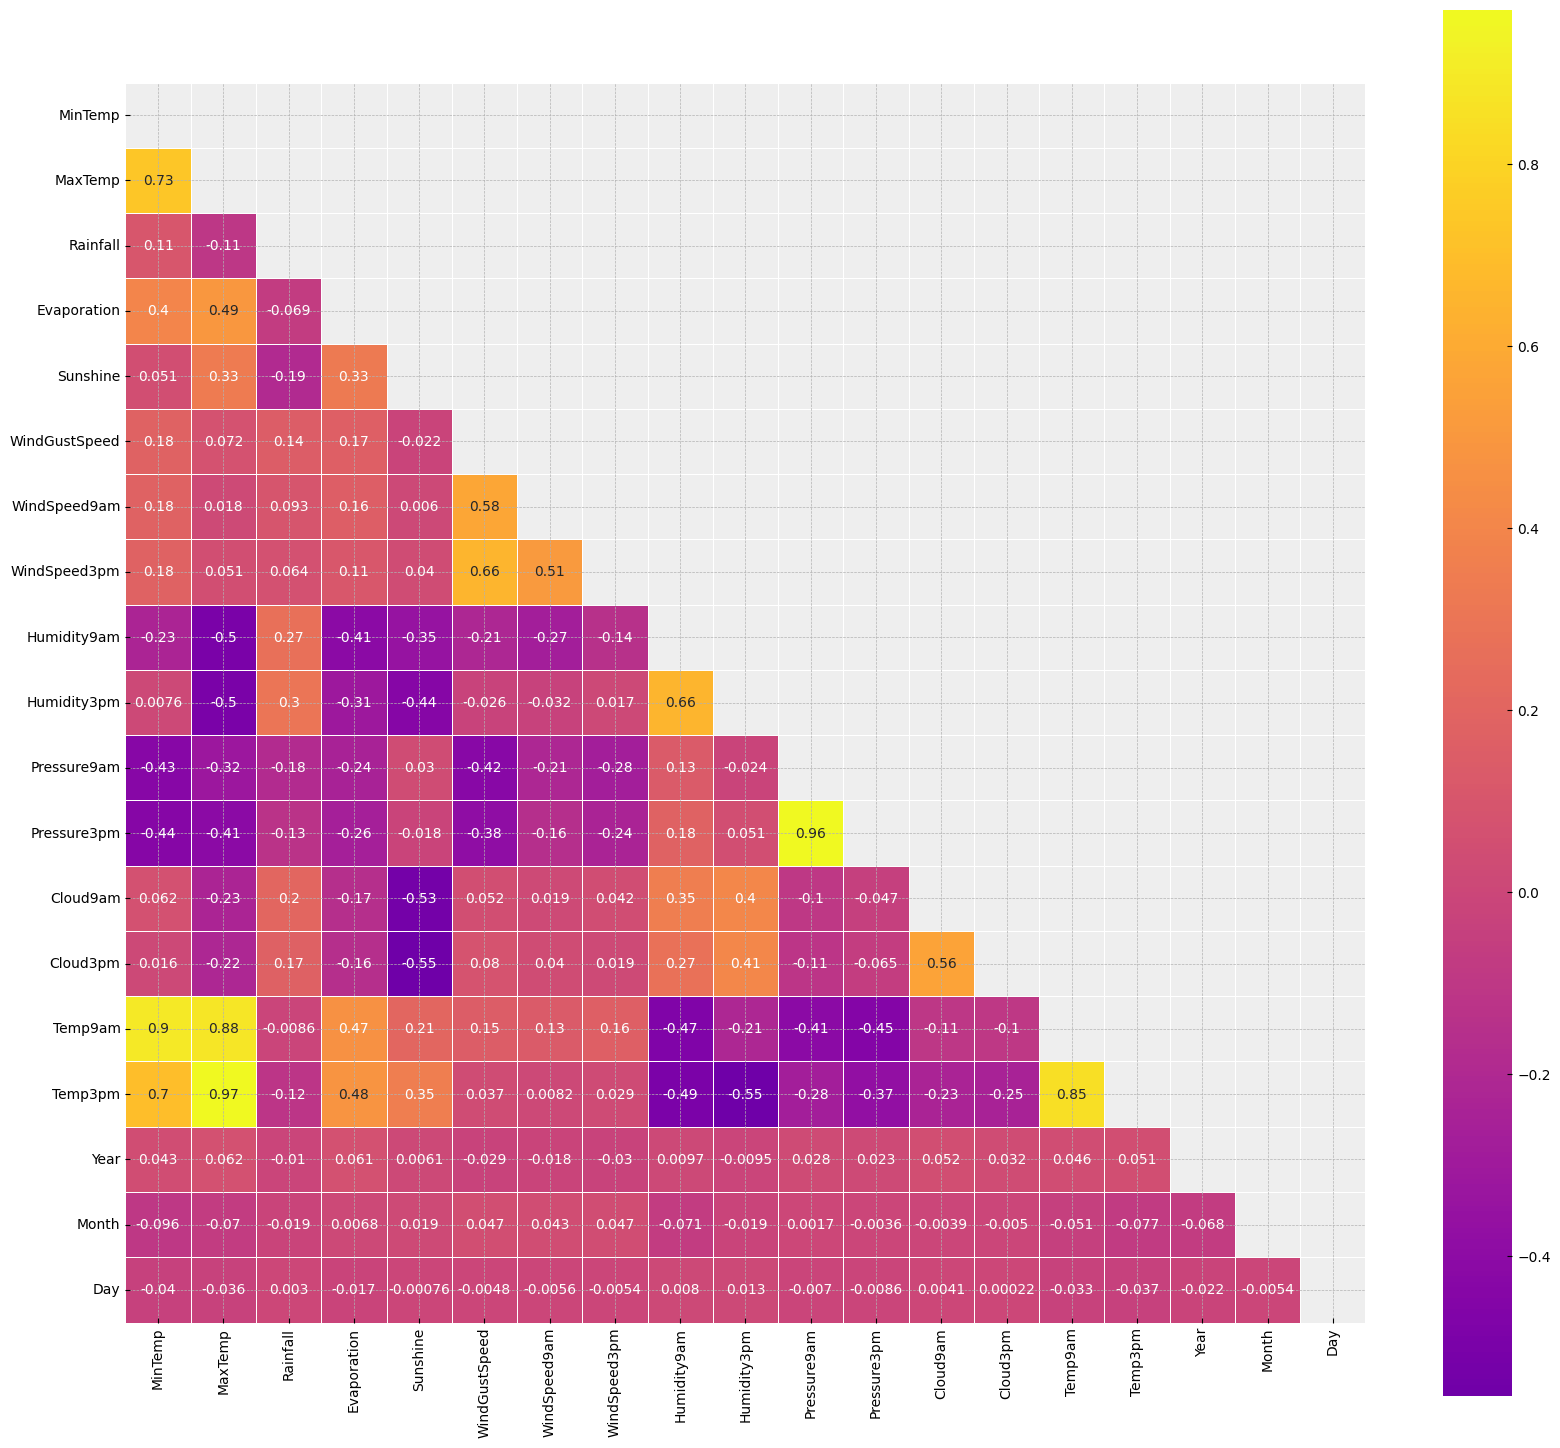

In [ ]:
mask = np.triu(np.ones_like(cor, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, mask=mask, cmap="plasma", vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

**Comentario:** considerando una fuerte correlación positiva mayor a 0.7 y ua fuerte correlación negativa menor -0.7, observamos que solo se tienen correlaciones fuertes positivas, se detallan a continuación estas correlaciones.

In [ ]:
# Umbral de correlación
umbral_correlacion = 0.7

# DataFrame con las variables que cumplen el criterio
df_correlacion_alta = pd.DataFrame(columns=['Variable1', 'Variable2', 'Correlación'])

# Iteración sobre las columnas de la matriz de correlación
for var1 in cor.columns:
    for var2 in cor.columns:
        if var1 != var2 and abs(cor.loc[var1, var2]) >= umbral_correlacion:
            df_correlacion_alta = pd.concat([
                df_correlacion_alta,
                pd.DataFrame({
                    'Variable1': [var1],
                    'Variable2': [var2],
                    'Correlación': [cor.loc[var1, var2]]
                })
            ], ignore_index=True)

# Visualización del DataFrame con correlaciones altas en formato de tabla
print(df_correlacion_alta.to_markdown(index=False))



| Variable1   | Variable2   |   Correlación |
|:------------|:------------|--------------:|
| MinTemp     | MaxTemp     |      0.732057 |
| MinTemp     | Temp9am     |      0.898283 |
| MaxTemp     | MinTemp     |      0.732057 |
| MaxTemp     | Temp9am     |      0.879752 |
| MaxTemp     | Temp3pm     |      0.969792 |
| Pressure9am | Pressure3pm |      0.959749 |
| Pressure3pm | Pressure9am |      0.959749 |
| Temp9am     | MinTemp     |      0.898283 |
| Temp9am     | MaxTemp     |      0.879752 |
| Temp9am     | Temp3pm     |      0.845919 |
| Temp3pm     | MaxTemp     |      0.969792 |
| Temp3pm     | Temp9am     |      0.845919 |


In [ ]:
# Visualizar gráficos de dispersión para variables con alta correlación
plt.figure()

sns.pairplot(df_weathercopia[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm','Pressure9am', 'Pressure3pm']])

plt.show()

<Figure size 640x480 with 0 Axes>

## EXPLORANDO VALORES CATEGÓRICOS

In [ ]:
categorica = [var for var in df_weathercopia.columns if df_weathercopia[var].dtype=='O']

print('Hay {} Variables Categóricas\n'.format(len(categorica)))

print('Las Variables Categóricas son:', categorica)

Hay 6 Variables Categóricas

Las Variables Categóricas son: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
df_weathercopia[categorica].head()

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0   Albury           W          W        WNW        No           No
1   Albury         WNW        NNW        WSW        No           No
2   Albury         WSW          W        WSW        No           No
3   Albury          NE         SE          E        No           No
4   Albury           W        ENE         NW        No           No

### EXPLORANDO VALORES NULOS

In [ ]:
df_weathercopia[categorica].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
df_weathercopia[categorica].isnull().mean() * 100 # Porcentaje de nulos en los valores categóricos

Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

**Comentario:** Por el porcentaje arrojado de valores faltantes mantendré las columnas e imputaré los mismos, considerando además que son datos faltantes completamente aleatorios (MCAR).

In [ ]:
for i in categorica:
    df_weathercopia[i].fillna(df_weathercopia[i].mode().iloc[0], inplace = True)

In [ ]:
for i in categorica:
    print(i, df_weathercopia[i].isnull().sum())

Location 0
WindGustDir 0
WindDir9am 0
WindDir3pm 0
RainToday 0
RainTomorrow 0


**Comentario:** Se han reemplazado los valores faltantes por la Moda

## VISUALIZACIONES

**1. Distribución de la cantidad de lluvia promedio(mm) en australia por ubicación geográfica**

In [ ]:
df_weather1=df_weathercopia[['Location','Rainfall']].groupby(by=['Location']).mean().reset_index()
df_weather1=df_weather1.rename(columns={'Rainfall':'Rainfallprom'})
df_weather1.head(10)

Location  Rainfallprom
0       Adelaide      1.554166
1         Albany      2.252113
2         Albury      1.810818
3   AliceSprings      0.839783
4  BadgerysCreek      2.034532
5       Ballarat      1.675826
6        Bendigo      1.572486
7       Brisbane      2.489184
8         Cairns      4.096190
9       Canberra      1.668239

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(df_weather1['Location'], df_weather1['Rainfallprom'])
ax.set_title('Precipitación Promedio por Localidad')
ax.set_ylabel('Precipitación Promedio(mm.)')
ax.set_xlabel('Localidad')
ax.tick_params(axis='x', rotation=90)

**Comentario:** La cantidad promedio es bastante variada a lo largo de las diferentes regiones, habiendo zonas con un mayor promedio de lluvia como la localidad de Cairns con 4.09 mm y siendo la de más bajo promedio, la localidad de Woomera con 0.48 mm aprox.

In [ ]:
df_weather1['Rainfallprom'].values.flatten()

array([1.55416626, 2.25211322, 1.81081828, 0.83978336, 2.03453196,
       1.67582635, 1.57248554, 2.48918434, 4.09619049, 1.66823869,
       1.11384054, 3.63718505, 2.11166807, 3.9247103 , 2.92136859,
       1.579287  , 2.60321176, 1.97171451, 1.8877694 , 1.40478564,
       0.85808752, 1.52002813, 2.03895858, 2.97379138, 2.73652014,
       0.92359574, 3.04938436, 2.72843814, 1.35498706, 1.66373903,
       2.01669978, 1.84528656, 1.72502493, 2.46866227, 1.96835332,
       1.48891129, 1.02854484, 2.91592366, 2.67190784, 2.37975287,
       1.94998344, 0.7449872 , 1.61371162, 2.81614446, 1.78867622,
       2.90779655, 2.75124044, 2.91946551, 0.48490135])

Text(0, 0.5, 'Frecuencia absoluta')

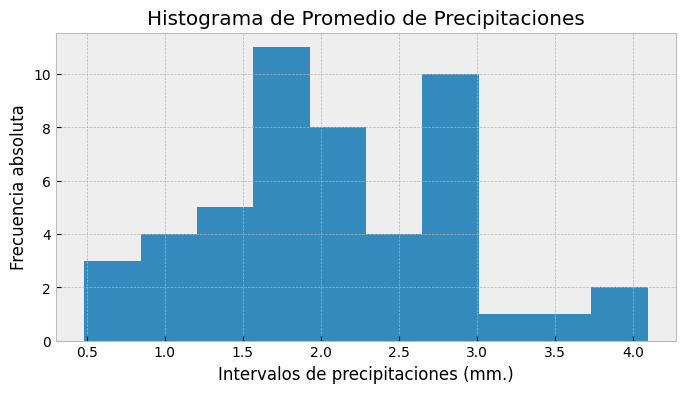

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_weather1['Rainfallprom'].values.flatten(), bins=10)
ax.set_title('Histograma de Promedio de Precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

**comentario:**

Tabla de Clasificación de la precipitación según la intensidad

Sin precipitación (0 mm/día): Sin lluvia.

Ligera (0.1 - 2.5 mm/día): Lluvia ligera, generalmente no causa impactos significativos.

Moderada (2.6 - 7.5 mm/día): Lluvia moderada, puede causar acumulación de agua en áreas bajas.

Fuerte (7.6 - 15 mm/día): Lluvia fuerte, puede resultar en inundaciones localizadas y problemas de drenaje.

Muy Fuerte (15.1 - 30 mm/día): Lluvia muy fuerte, mayor riesgo de inundaciones y deslizamientos de tierra.

Torrencial (30.1 - 50 mm/día): Lluvia torrencial, riesgo significativo de inundaciones repentinas y deslizamientos de tierra.

Excepcionalmente Fuerte (>50 mm/día): Lluvia excepcionalmente fuerte, puede provocar inundaciones graves y daños significativos.


---


De acuerdo a a la tabla anterior y al histograma de frecuencia generado por localidad, Australia presenta precipitaciones de ligeras a moderadas, con casi la misma proporcion de ocurrencia, pero predominando las precipitaciones ligeras.


**2. Correlación entre la cantidad de lluvia y la humedad del viento**

In [ ]:
df_weather2 = df_weather.copy()

In [ ]:
df_lluvyhum= df_weathercopia[['Rainfall','Humidity9am','Humidity3pm','Year']].groupby(by=['Year']).mean().reset_index()
df_lluvyhum=df_lluvyhum.rename(columns={'Rainfall':'Rainfallprom','Humidity9am':'Humidity9amprom','Humidity3pm':'Humidity3pmprom'})
df_lluvyhum.head()

Year  Rainfallprom  Humidity9amprom  Humidity3pmprom
0  2007      3.180328        69.557377        45.786885
1  2008      2.126131        65.514246        49.332775
2  2009      1.907819        67.367415        50.110212
3  2010      2.422748        70.775855        53.897844
4  2011      2.447494        70.544210        53.796238

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[9,9]))
sns.scatterplot(data= df_lluvyhum, x=df_lluvyhum['Rainfallprom'], y=df_lluvyhum['Humidity9amprom'], ax=axs[0])
sns.scatterplot(data=df_lluvyhum, x=df_lluvyhum['Rainfallprom'], y=df_lluvyhum['Humidity3pmprom'], alpha=.8, legend=False, ax=axs[1])

<Axes: xlabel='Rainfallprom', ylabel='Humidity3pmprom'>

**Comentario:** Por la distribución de los datos se logra observar una correlación positiva entre la humedad promedio y la precipitación promedio anual, a mayor humedad mayor precipitación. La humedad alta en el viento favorece la precipitación.

**3. Relacion de la direccion del viento a las 9 am con la probabilidad de lluvia al dia siguente**

In [ ]:
df_weather3=df_weathercopia[['WindDir9am','RainTomorrow']]
df_weather3.head()

WindDir9am RainTomorrow
0          W           No
1        NNW           No
2          W           No
3         SE           No
4        ENE           No

In [ ]:
crosstab = pd.crosstab(df_weather3['WindDir9am'], df_weather3['RainTomorrow'], normalize=1)
print(crosstab)

RainTomorrow        No       Yes
WindDir9am                      
E             0.069209  0.041252
ENE           0.056972  0.042821
ESE           0.057333  0.035072
N             0.148728  0.170374
NE            0.053732  0.049189
NNE           0.052754  0.067039
NNW           0.048863  0.076231
NW            0.055994  0.074944
S             0.061435  0.052734
SE            0.068637  0.046774
SSE           0.066128  0.050224
SSW           0.052314  0.051605
SW            0.057350  0.059886
W             0.055484  0.067666
WNW           0.048123  0.061110
WSW           0.046944  0.053079


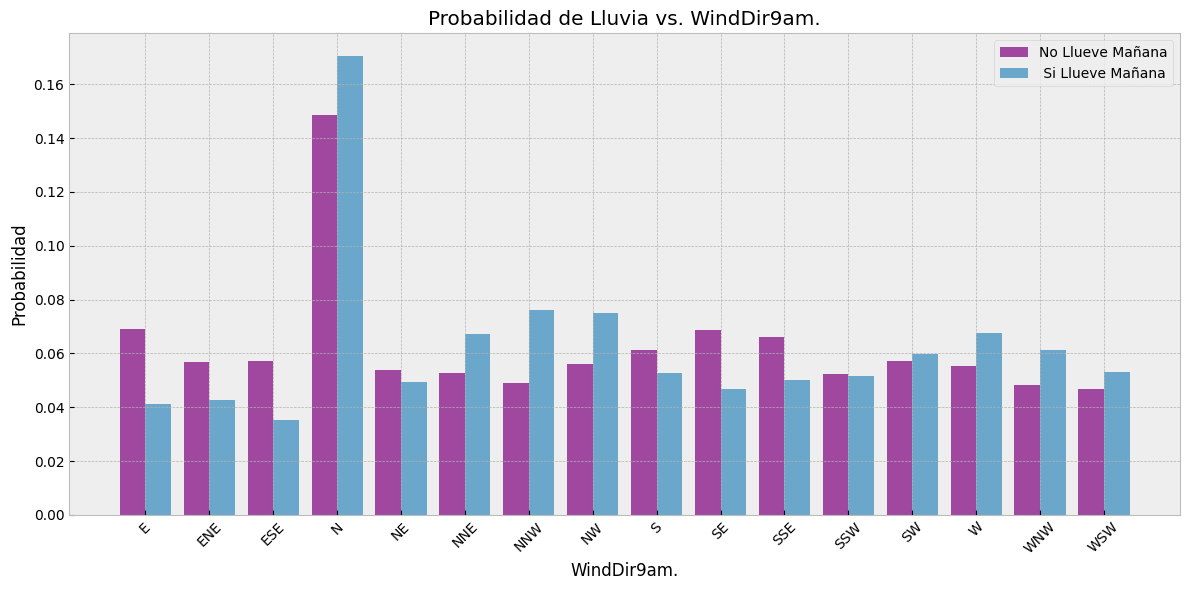

In [ ]:
# Configurar la posición de las barras
x = np.arange(len(crosstab.index))
width = 0.4  # Ancho de las barras

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, crosstab['No'], width, label='No Llueve Mañana', alpha=0.7, color='purple')
rects2 = ax.bar(x + width/2, crosstab['Yes'], width, label=' Si Llueve Mañana', alpha=0.7)

# Etiquetas, título y leyenda
ax.set_xlabel('WindDir9am.')
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Lluvia vs. WindDir9am.')
ax.set_xticks(x)
ax.set_xticklabels(crosstab.index, rotation=45)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:**La probabilidad de lluvia al día siguiente esta muy favorecida por la  dirección del viento a las 9 am  Norte (N).

**4. Relacion de la direccion del viento a las 3 pm con la probabilidad de lluvia al dia siguente**

In [ ]:
df_weather4=df_weathercopia[['WindDir3pm','RainTomorrow']]
df_weather4.head()

WindDir3pm RainTomorrow
0        WNW           No
1        WSW           No
2        WSW           No
3          E           No
4         NW           No

In [ ]:
crosstab1 = pd.crosstab(df_weather4['WindDir3pm'], df_weather4['RainTomorrow'], normalize=1)
print(crosstab)

RainTomorrow        No       Yes
WindDir9am                      
E             0.069209  0.041252
ENE           0.056972  0.042821
ESE           0.057333  0.035072
N             0.148728  0.170374
NE            0.053732  0.049189
NNE           0.052754  0.067039
NNW           0.048863  0.076231
NW            0.055994  0.074944
S             0.061435  0.052734
SE            0.068637  0.046774
SSE           0.066128  0.050224
SSW           0.052314  0.051605
SW            0.057350  0.059886
W             0.055484  0.067666
WNW           0.048123  0.061110
WSW           0.046944  0.053079


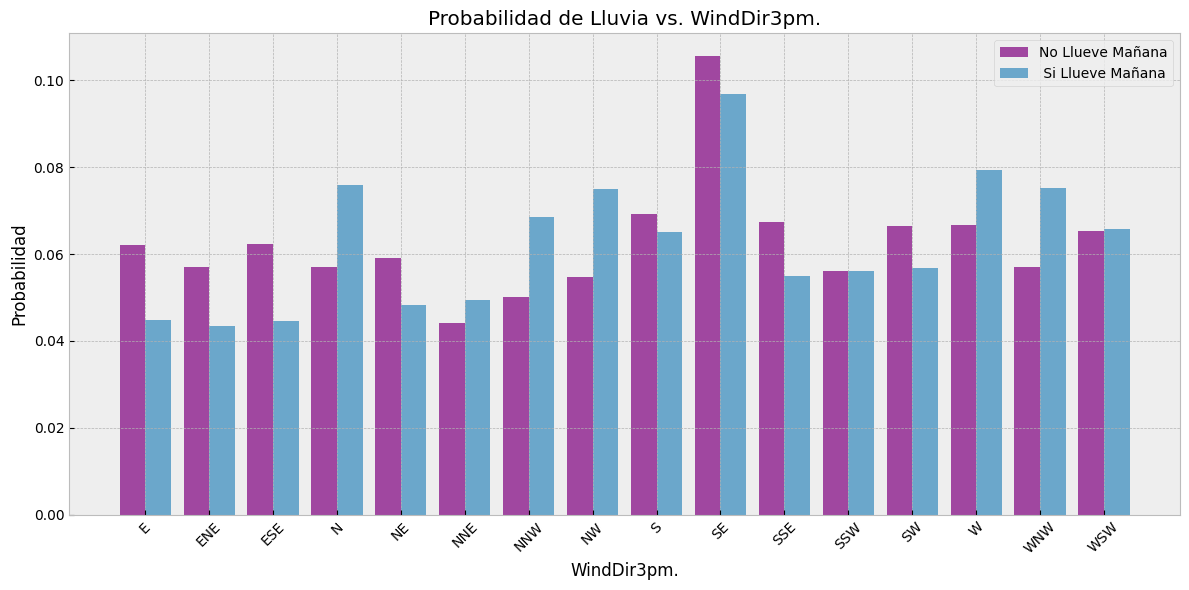

In [ ]:
# Configurar la posición de las barras
x = np.arange(len(crosstab1.index))
width = 0.4  # Ancho de las barras

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, crosstab1['No'], width, label='No Llueve Mañana', alpha=0.7, color='purple')
rects2 = ax.bar(x + width/2, crosstab1['Yes'], width, label=' Si Llueve Mañana', alpha=0.7)

# Etiquetas, título y leyenda
ax.set_xlabel('WindDir3pm.')
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Lluvia vs. WindDir3pm.')
ax.set_xticks(x)
ax.set_xticklabels(crosstab.index, rotation=45)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:**La probabilidad de lluvia al día siguiente esta favorecida por la  dirección del viento a las 3pm SurEste (SE).

**5. Relacion de la direccion de la rafaga de viento mas rapida con la probabilidad de lluvia al dia siguente**

In [ ]:
df_weather5=df_weathercopia[['WindGustDir','RainTomorrow']]
df_weather5.head()

WindGustDir RainTomorrow
0           W           No
1         WNW           No
2         WSW           No
3          NE           No
4           W           No

In [ ]:
crosstab2 = pd.crosstab(df_weather5['WindGustDir'], df_weather5['RainTomorrow'], normalize=1)
print(crosstab)

RainTomorrow        No       Yes
WindDir9am                      
E             0.069209  0.041252
ENE           0.056972  0.042821
ESE           0.057333  0.035072
N             0.148728  0.170374
NE            0.053732  0.049189
NNE           0.052754  0.067039
NNW           0.048863  0.076231
NW            0.055994  0.074944
S             0.061435  0.052734
SE            0.068637  0.046774
SSE           0.066128  0.050224
SSW           0.052314  0.051605
SW            0.057350  0.059886
W             0.055484  0.067666
WNW           0.048123  0.061110
WSW           0.046944  0.053079


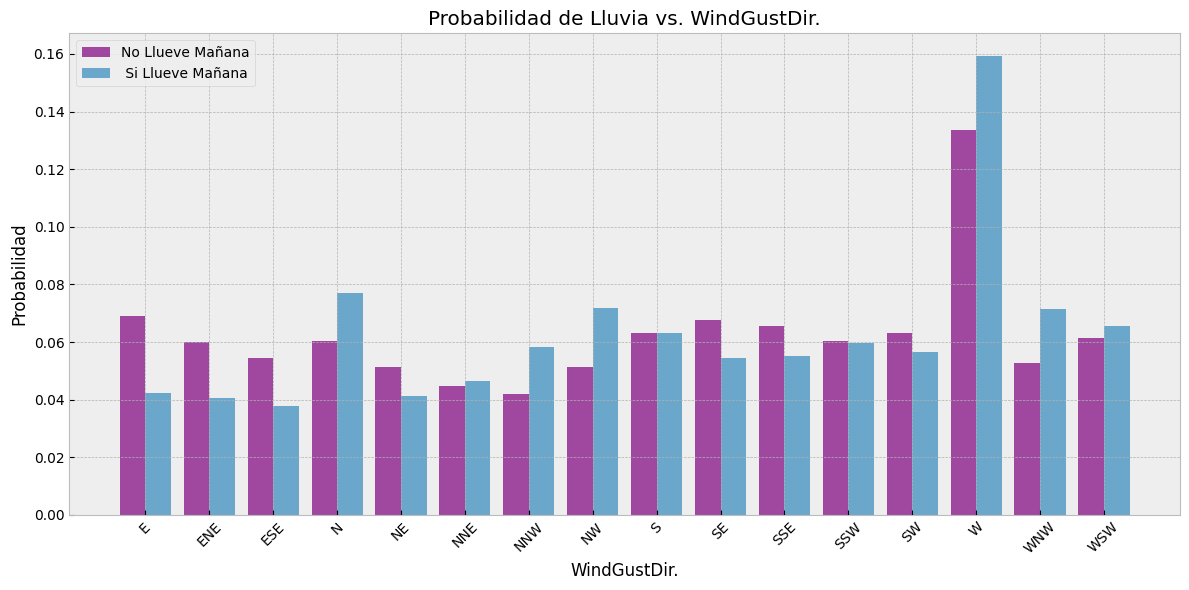

In [ ]:
# Configurar la posición de las barras
x = np.arange(len(crosstab2.index))
width = 0.4  # Ancho de las barras

# Crear el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, crosstab2['No'], width, label='No Llueve Mañana', alpha=0.7, color='purple')
rects2 = ax.bar(x + width/2, crosstab2['Yes'], width, label=' Si Llueve Mañana', alpha=0.7)

# Etiquetas, título y leyenda
ax.set_xlabel('WindGustDir.')
ax.set_ylabel('Probabilidad')
ax.set_title('Probabilidad de Lluvia vs. WindGustDir.')
ax.set_xticks(x)
ax.set_xticklabels(crosstab.index, rotation=45)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario:**La probabilidad de lluvia al día siguiente esta favorecida por la  dirección de la rafaga viento mas rapida Oeste (W).

**6. Analisis de cada variable con respecto a la variable objetivo RainTomorrow.**

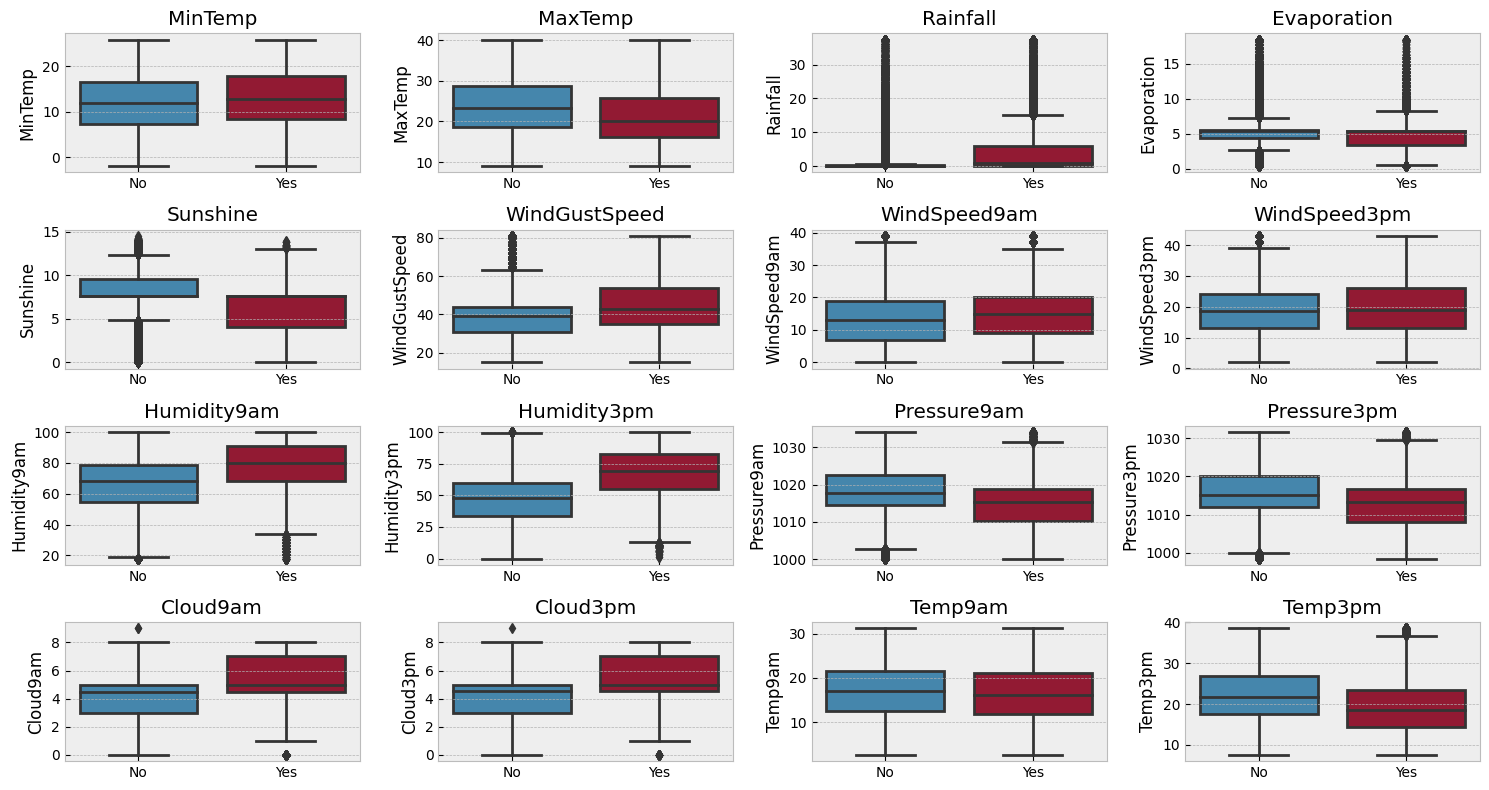

In [ ]:
variables_numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Número de columnas en el diseño de subgráficos
columns = 4

# Crear subgráficos con un diseño de filas y columnas
fig, axes = plt.subplots(len(variables_numericas ) // columns, columns, figsize=(15, 8))

# Iterar sobre las variables numéricas
for current_idx, variable in enumerate(variables_numericas ):
    # Calcular la posición de fila y columna en la cuadrícula de subgráficos
    i = current_idx // columns
    j = current_idx % columns

    # Crear un gráfico de caja para la variable actual en relación con 'Gender'
    sns.boxplot(y=df_weathercopia[variable], x=df_weathercopia['RainTomorrow'], orient='v', ax=axes[i][j])

    # Configurar el título y la etiqueta del eje x para la subgráfica actual
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

# Ajustar el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()



**Comentarios:**



*   **MinTemp :** Presenta una media similar tanto para la lluvia como no lluvia del dia siguiente, con rangos de temperaturas de entre 9 y 15 grados aproximadamente. Se puede concluir que, en promedio, la temperatura mínima no varía significativamente entre días lluviosos y no lluviosos.
*   **MinTemp :** La temperatura maxima es mas baja cuando hay probabilidad de lluvia.
*   **Rainfall :** Los valores de precipitacion estan asociados a la posibilidad de lluvia
*   **Evaporation :** La media de la tasa de evaporacion es m;as baja para los dias que mas probablemente llueva. Lo cual tiene sentido, ya que la lluvia añade humedad al entorno, lo que podría reducir la necesidad de evaporación.
*   **Sunshine :** Se observa que las cantidades de exposicion solar menores favorecen la lluvia al dia siguiente.
*   **WindGustSpeed :** Las velocidades de rafaga de vientos mas rapida se asocian a la posobildad de lluvia. Las ráfagas rápidas del viento pueden transportar humedad desde áreas húmedas hacia áreas más secas. Si estas ráfagas llegan a una región con condiciones adecuadas, podrían contribuir a la formación de nubes y, eventualmente, a la lluvia.
*   **WindSpeed9am  :** La media de la velocidad es ligeramente mayor para la categoria de si lluvia.
*   **WindSpeed3pm  :**Ambas categorias tienen medias similares, lo que quiere decir que la velocidad del viento a las 3p no varia mucho si llueve o no.
*   **Humidity9am y Humidity3pm:** Ambas variables presentan medias mas altas para la probalidad de lluvia que para la no lluvia. niveles mas altos de humedad en el aire están asociados con un mayor potencial de precipitación. Cuando el aire húmedo se eleva y se enfría, la humedad que contiene se condensa para formar gotas de agua.
*   **Pressure9am y Pressure3pm:** Del gráfico observamos que los rangos de valores más altos de presiones se encuentran relacionados a la probabilidad de que no llueva al día siguente en consecuencia un rango de presiones más bajos aumentan la probabilidad de lluvia al día siguiente.  
*   **Cloud9am y Cloud3pm:** Se observa que rangos de nubosidad mas altos estan relacionados con la probailidad de lluvia.
*   **Temp9am :** La temperatura no varia significativamente entre las categorias de lluvia y no lluvia.
*   **Temp3pm :**Temperaturas mas bajas favorecen la probabilidad de lluvia.

#  **INGENIERÍA DE CARACTERÍSTICAS**

## CODIFICACION DE VARIABLES CATEGORICAS

In [ ]:
df_weatherdef = df_weathercopia.copy() # Creando una nueva copia para guardar las transforaciones del EDA

In [ ]:
for i in categorica:

    print(i, ' contiene ', len(df_weatherdef[i].unique()), ' labels')

Location  contiene  49  labels
WindGustDir  contiene  16  labels
WindDir9am  contiene  16  labels
WindDir3pm  contiene  16  labels
RainToday  contiene  2  labels
RainTomorrow  contiene  2  labels


In [ ]:
lencoders = {}
# Diccionario para almacenar los objetos LabelEncoder

for i in categorica:
    lencoders[i] = LabelEncoder()

# Crear un objeto LabelEncoder para cada columna
    df_weatherdef[i] = lencoders[i].fit_transform(df_weatherdef[i])

In [ ]:
df_weatherdef

Location  MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0              2     13.4  22.90000       0.6     5.379554  7.611178   
1              2      7.4  25.10000       0.0     5.379554  7.611178   
2              2     12.9  25.70000       0.0     5.379554  7.611178   
3              2      9.2  28.00000       0.0     5.379554  7.611178   
4              2     17.5  32.30000       1.0     5.379554  7.611178   
...          ...      ...       ...       ...          ...       ...   
145455        41      2.8  23.40000       0.0     5.379554  7.611178   
145456        41      3.6  25.30000       0.0     5.379554  7.611178   
145457        41      5.4  26.90000       0.0     5.379554  7.611178   
145458        41      7.8  27.00000       0.0     5.379554  7.611178   
145459        41     14.9  23.24405       0.0     5.379554  7.611178   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0                13      44.000000          13          14  ...       1007.1   
1                14      44.000000           6          15  ...       1007.8   
2                15      46.000000          13          15  ...       1008.7   
3                 4      24.000000           9           0  ...       1012.8   
4                13      41.000000           1           7  ...       1006.0   
...             ...            ...         ...         ...  ...          ...   
145455            0      31.000000           9           1  ...       1020.3   
145456            6      22.000000           9           3  ...       1019.1   
145457            3      37.000000           9          14  ...       1016.8   
145458            9      28.000000          10           3  ...       1016.5   
145459           13      39.971752           2           2  ...       1017.9   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0       8.000000   4.50993     16.9     21.8          0             0  2008   
1       4.447461   4.50993     17.2     24.3          0             0  2008   
2       4.447461   2.00000     21.0     23.2          0             0  2008   
3       4.447461   4.50993     18.1     26.5          0             0  2008   
4       7.000000   8.00000     17.8     29.7          0             0  2008   
...          ...       ...      ...      ...        ...           ...   ...   
145455  4.447461   4.50993     10.1     22.4          0             0  2017   
145456  4.447461   4.50993     10.9     24.5          0             0  2017   
145457  4.447461   4.50993     12.5     26.1          0             0  2017   
145458  3.000000   2.00000     15.1     26.0          0             0  2017   
145459  8.000000   8.00000     15.0     20.9          0             0  2017   

        Month  Day  
0           1   12  
1           2   12  
2           3   12  
3           4   12  
4           5   12  
...       ...  ...  
145455      6   21  
145456      6   22  
145457      6   23  
145458      6   24  
145459      6   25  

[145460 rows x 25 columns]

## ELIMINANDO VARIABLES

In [ ]:
df_weatherdef1 = df_weatherdef.drop(['Location', 'RainToday','Year', 'Month', 'Day'], axis=1) # se crea un nuevo datafarame sin las columnas dadas

In [ ]:
df_weatherdef1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

## NORMALIZACION

In [ ]:
scaler=MinMaxScaler()

df_weatherdf1_scaled= scaler.fit_transform(df_weatherdef1)

df_weatherdf1_scaled= pd.DataFrame(df_weatherdf1_scaled, columns=df_weatherdef1.columns)

df_weatherdf1_scaled.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.552347  0.446945  0.016043     0.276642  0.524909     0.866667   
1  0.335740  0.517685  0.000000     0.276642  0.524909     0.933333   
2  0.534296  0.536977  0.000000     0.276642  0.524909     1.000000   
3  0.400722  0.610932  0.000000     0.276642  0.524909     0.266667   
4  0.700361  0.749196  0.026738     0.276642  0.524909     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.439394    0.866667    0.933333      0.512821      0.536585   
1       0.439394    0.400000    1.000000      0.102564      0.487805   
2       0.469697    0.866667    1.000000      0.487179      0.585366   
3       0.136364    0.600000    0.000000      0.282051      0.170732   
4       0.393939    0.066667    0.466667      0.179487      0.439024   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0     0.646341         0.22     0.221893     0.259819  0.888889  0.501103   
1     0.317073         0.25     0.307692     0.280967  0.494162  0.501103   
2     0.243902         0.30     0.218935     0.308157  0.494162  0.222222   
3     0.329268         0.16     0.514793     0.432024  0.494162  0.501103   
4     0.780488         0.33     0.313609     0.226586  0.777778  0.888889   

    Temp9am   Temp3pm  RainTomorrow  
0  0.500000  0.459547           0.0  
1  0.510490  0.540453           0.0  
2  0.643357  0.504854           0.0  
3  0.541958  0.611650           0.0  
4  0.531469  0.715210           0.0

## SEPARACION DE VARIABLES INDEPENDIENTES(X) Y VARIABLE DEPENDIENTE(Y)

In [ ]:
X = df_weatherdf1_scaled.drop('RainTomorrow', axis = 1) #colocamos todas las variables menos la que quiero predecir

y = df_weatherdf1_scaled['RainTomorrow'] #solo colocamos la variable que quiero predecir

## SEPARACION DE CONJUNTO DE ENTRENAMIENTO(train) Y CONJUNTO DE PRUEBA(test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print('conjunto de entrenamiento', X_train.shape)
print('conjunto de prueba', X_test.shape)


conjunto de entrenamiento (101822, 19)
conjunto de prueba (43638, 19)


## BALANCEO DE LA VARIABLE A PREDECIR DEL CONJUNTO DE ENTRENAMIENTO(y_train)

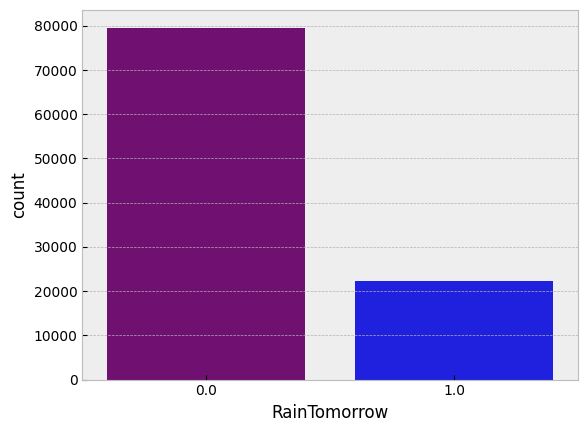

In [ ]:
cols= ["purple","blue"]
sns.countplot(x = y_train, palette= cols)
plt.show()

**Comentario:** Recordando que la categoria NO es 0.0 y la Categoría SI es 1.0, vemos un gran desbalance entre estas, por lo que se procede a ajustar las muestras.

In [ ]:
# Conteo de las instancias de cada clase en y_train antes del balanceo
unique_classes_before, counts_before = np.unique(y_train, return_counts=True)

# Imprimir los resultados
print("Instancias por clase antes del balanceo:")
for cls, count in zip(unique_classes_before, counts_before):
    print(f"Clase {cls}: {count} instancias")

Instancias por clase antes del balanceo:
Clase 0.0: 79596 instancias
Clase 1.0: 22226 instancias


In [ ]:
# Creo el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplico el sobremuestreo solo a y_train
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Conteo de las instancias de cada clase en y_train después del balanceo
unique_classes_after, counts_after = np.unique(y_train_balanced, return_counts=True)

# Imprimir los resultados
print("\nInstancias por clase después del balanceo:")
for cls, count in zip(unique_classes_after, counts_after):
    print(f"Clase {cls}: {count} instancias")


Instancias por clase después del balanceo:
Clase 0.0: 79596 instancias
Clase 1.0: 79596 instancias


In [ ]:
cols= ["purple","blue"]
sns.countplot(x = y_train_balanced, palette= cols)
plt.show()

## REDUCCION DE DIMENSION CON PCA

In [ ]:
pca = PCA()
pca.fit(X_train_balanced)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
print('El nro de componentes necesarias es: ', d )

El nro de componentes necesarias es:  12


In [ ]:
pca = PCA(n_components=d)
X_red = pca.fit_transform(X_train_balanced)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9518480549572553

**Comentario:** las 12 componentes se ajustan el 95.18% de la variación de los datos.

In [ ]:
X_train_red = pca.transform(X_train_balanced)
X_test_red = pca.transform(X_test)

In [ ]:
print('conjunto de entrenamiento', X_train_red.shape)
print('conjunto de prueba', X_test_red.shape)

conjunto de entrenamiento (159192, 12)
conjunto de prueba (43638, 12)


# **MODELOS DE CLASIFICACION PARA ENTRENAR**

## 1. REGRESION LOGISTICA

In [ ]:
model_LOR = LogisticRegression()

In [ ]:
model_LOR.fit(X_train_red, y_train_balanced)

LogisticRegression()

In [ ]:
%time model_LOR

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


LogisticRegression()

In [ ]:
y_test_predLOR = model_LOR.predict(X_test_red) #predicción del cojunto de prueba

### METRICAS Y EVALUACION

In [ ]:
accuracy = accuracy_score(y_test, y_test_predLOR)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.7708877583757275


In [ ]:
y_train_predLOR = model_LOR.predict(X_train_red)

In [ ]:
train_accuracy = accuracy_score(y_train_balanced, y_train_predLOR)
test_accuracy = accuracy_score(y_test, y_test_predLOR)

print('accuracy en entrenamiento', train_accuracy)
print('accuracy en test', test_accuracy)

accuracy en entrenamiento 0.7640710588471783
accuracy en test 0.7708877583757275


**Comentario:** Los resultados de la regresión logística son bastante coherentes en términos de rendimiento entre el conjunto de entrenamiento y el conjunto de prueba.

### MATRIZ DE CONFUSION

In [ ]:
confusion_matrix(y_test, y_test_predLOR)

array([[26358,  7629],
       [ 2369,  7282]])

**Comentarios:**

De la matriz de confusión tenemos que :

-- Hay 33640 (26358 + 7282) observaciones predichas correctamente por el modelo y 9998 (2369 + 7629) predicciones incorrectas.

-- 26358 observaciones son Verdaderos Negativos (TN): El modelo predijo "NO" para la probabilidad de lluvia y la muestra real también es "NO" .

-- 7629 observaciones son Falsos Positivos (FP): El modelo predijo "SI" para la probabilidad de lluvia, pero la muestra real es "NO".

-- 2369 observaciones son Falsos Negativos (FN): El modelo predijo "NO" para la probabilidad de lluvia, pero la muestra real es "SI".

-- 7629 observaciones son Verdaderos Positivos (TP): El modelo predijo "SI" para la probabilidad de lluvia y la muestra real también es "SI".

### REPORTE DE METRICAS

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_test_predLOR))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84     33987
         1.0       0.49      0.75      0.59      9651

    accuracy                           0.77     43638
   macro avg       0.70      0.77      0.72     43638
weighted avg       0.82      0.77      0.79     43638



**Comentarios:**

1. Categoría 0 (No llueve):

*   Precision (0.92): El 92% de las instancias clasificadas como "No llueve" por el modelo realmente no llovieron.
*   Recall (0.78): El modelo identificó correctamente el 78% de las instancias donde realmente no llovió.

2. Categoría 1 (Llueve):

*   Precision (0.49): El 49% de las instancias clasificadas como "Llueve" realmente llovieron.
*   Recall (0.75): El modelo identificó correctamente el 75% de las instancias donde realmente llovió.



La alta precisión en la categoría 0 sugiere que cuando el modelo predice "No llueve", tiene bastante confianza y tiende a estar en lo correcto en la mayoría de los casos.

La precisión más baja en la categoría 1 indica que hay un número significativo de falsos positivos. Es decir, cuando el modelo predice "Llueve", a veces se equivoca.

El recall relativamente alto en la categoría 1 sugiere que el modelo es efectivo para identificar la mayoría de las instancias donde realmente llovió.

El F1-score proporciona un equilibrio entre precisión y recall. Un F1-score alto indica un buen equilibrio entre estas dos métricas.

En resumen, el modelo parece ser bastante bueno para predecir la categoría "No llueve", pero hay margen para mejorar en la categoría "Llueve", especialmente en términos de precisión.

### CURVA ROC

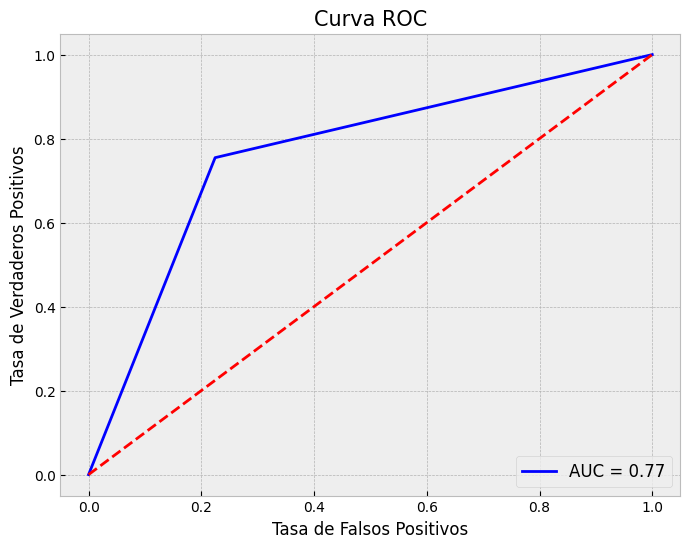

In [ ]:
#predichas o las predicciones del modelo
fpr, tpr, thresholds = roc_curve(y_test, y_test_predLOR)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC', fontsize=15)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.legend(loc='lower right', prop={'size': 12})
plt.show()

**Comentario:** Con un AUC-ROC de 0.77 el modelo tiene un rendimiento aceptable; lo que siguere que tiene un nivel razonable de discriminación.

## 2. ARBOL DE DECISION

In [ ]:
clf = DecisionTreeClassifier(random_state=1234) #instanciar

In [ ]:
model = clf.fit(X_train_red, y_train_balanced) # ajuste del modelo

In [ ]:
%time model

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


DecisionTreeClassifier(random_state=1234)

In [ ]:
y_pred_testCLF = model.predict(X_test_red) #predicción del conjunto de prueba

### METRICAS Y EVALUACION

In [ ]:
accuracy = accuracy_score(y_test, y_pred_testCLF)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.7374077638755213


In [ ]:
y_train_predCLF = model.predict(X_train_red)

In [ ]:
train_accuracy = accuracy_score(y_train_balanced, y_train_predCLF)
test_accuracy = accuracy_score(y_test, y_pred_testCLF)

print('accuracy en entrenamiento', train_accuracy)
print('accuracy en test', test_accuracy)

accuracy en entrenamiento 0.9998869289914066
accuracy en test 0.7374077638755213


**Comentario:** Los resultados muestran una discrepancia significativa entre la Accuracy del modelo en el conjunto de entrenamiento y en el conjunto de prueba. El Accuracy de entrenamiento es excepcionalmente alta (casi 100%), mientras que en el conjunto de prueba es considerablemente más baja (alrededor del 74%). Este tipo de discrepancia indica sobreajuste o overfitting en el modelo.

El modelo se esta ajustando demasiado bien a los datos de entrenamiento específicos y no generaliza bien a datos nuevos o no vistos.

### MATRIZ DE CONFUSION

In [ ]:
confusion_matrix(y_test, y_pred_testCLF)

array([[26519,  7468],
       [ 3991,  5660]])

**Comentarios:**

De la matriz de confusión tenemos que :

-- Hay 32179 (26519 + 5660) observaciones predichas correctamente por el modelo y 11459 (3991 + 7468) predicciones incorrectas.  

-- 26519 observaciones son Verdaderos Negativos (TN): El modelo predijo "NO" para la probabilidad de lluvia y la muestra real también es "NO" .

-- 7468 observaciones son Falsos Positivos (FP): El modelo predijo "SI" para la probabilidad de lluvia, pero la muestra real es "NO".

-- 3991 observaciones son Falsos Negativos (FN): El modelo predijo "NO" para la probabilidad de lluvia, pero la muestra real es "SI".

-- 5660 observaciones son Verdaderos Positivos (TP): El modelo predijo "SI" para la probabilidad de lluvia y la muestra real también es "SI".

### REPORTE DE METRICAS

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred_testCLF))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82     33987
         1.0       0.43      0.59      0.50      9651

    accuracy                           0.74     43638
   macro avg       0.65      0.68      0.66     43638
weighted avg       0.77      0.74      0.75     43638



**Comentarios:**

1. Categoría 0 (No llueve):

*   Precision (0.87): El 87% de las instancias clasificadas como "No llueve" por el modelo realmente no llovieron.
*   Recall (0.78): El modelo identificó correctamente el 78% de las instancias donde realmente no llovió.

2. Categoría 1 (Llueve):

*   Precision (0.43): El 43% de las instancias clasificadas como "Llueve" realmente llovieron.
*   Recall (0.59): El modelo identificó correctamente el 59% de las instancias donde realmente llovió.

Similar al modelo de regresión logística, la alta precisión en la categoría 0 indica que cuando el modelo predice "No llueve", suele estar en lo correcto.

La precisión más baja en la categoría 1 indica que hay un número significativo de falsos positivos. Es decir, cuando el modelo predice "Llueve", a veces se equivoca.

El recall relativamente alto en la categoría 1 sugiere que el modelo es efectivo para identificar la mayoría de las instancias donde realmente llovió.

La puntuación F1 proporciona un equilibrio entre precisión y recall.

En resumen, el modelo tiene un rendimiento similar al modelo de regresión logística en este caso. Se pueden considerar ajustes en los hiperparámetros del árbol para mejorar estas métricas.


### CURVA ROC

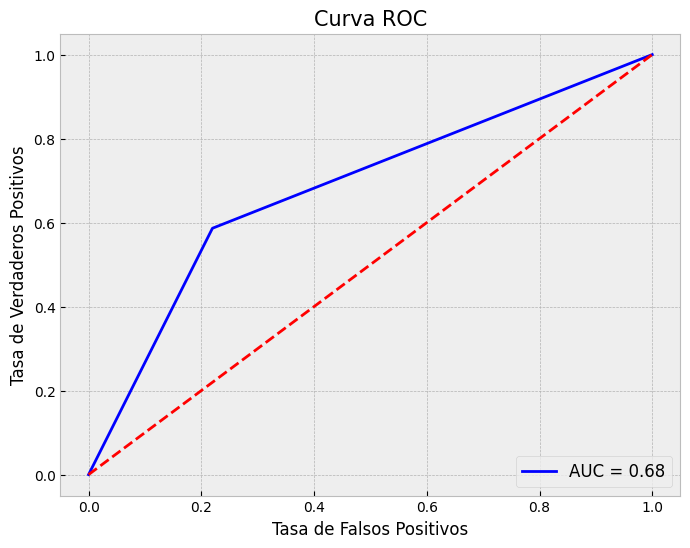

In [ ]:
#predichas o las predicciones del modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testCLF)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC', fontsize=15)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.legend(loc='lower right', prop={'size': 12})
plt.show()

**Comentario:** Con un AUC-ROC de 0.68  el rendimiento va de pobre a moderado; el modelo tiene cierta capacidad de discriminación, pero puede haber margen de mejora.

# **OPTIMIZACION DE MODELOS**

**AJUSTE DE HIPERPARAMETROS CON GRIDSEACRHCV:** Que combina la búsqueda de hiperparámetros y la validación cruzada para evaluar el rendimiento de diferentes combinaciones de parámetros en múltiples subdivisiones del conjunto de datos de entrenamiento. Esto ayuda a evitar el sobreajuste a un conjunto de datos específico y proporciona una evaluación más robusta del rendimiento del modelo.

## 1. REGRESION LOGISTICA

In [ ]:
model_LORNew = LogisticRegression() # Modelo de regresion

# Cuadrícula de parámetros para GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(model_LORNew, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_red, y_train_balanced)
test_score_lr = grid_search_lr.best_estimator_.score(X_train_red, y_train_balanced)

print(f"Best penalty value: {grid_search_lr.best_params_['penalty']}")
print(f"Best C value: {grid_search_lr.best_params_['C']}")
print(f"Best solver value: {grid_search_lr.best_params_['solver']}")
print(f"Best max_iter value: {grid_search_lr.best_params_['max_iter']}")
print(f"Best accuracy: {grid_search_lr.best_score_}")

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best penalty value: l1
Best C value: 0.1
Best solver value: saga
Best max_iter value: 500
Best accuracy: 0.7639580206527066


In [ ]:
# nuevo modelo con los mejores parámetros
best_model_LORNew = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=100)

# Entrenar el modelo con los datos de entrenamiento
best_model_LORNew.fit(X_train_red, y_train_balanced)

# Predecir con el conjunto de prueba
y_pred_testbmn = best_model_LORNew.predict(X_test_red)

# Evaluar la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_testbmn)
print(f"Precisión en el conjunto de prueba: {accuracy_test}")

# Evaluar la precisión en el conjunto de prueba
y_train_predLORNew = best_model_LORNew.predict(X_train_red)
train_accuracy = accuracy_score(y_train_balanced, y_train_predLORNew)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")

Precisión en el conjunto de prueba: 0.7708190109537559
Precisión en el conjunto de entrenamiento: 0.7639768330066837


### MATRIZ DE CONFUSION

In [ ]:
confusion_matrix(y_test, y_pred_testbmn)

array([[26358,  7629],
       [ 2372,  7279]])

### REPORTE DE METRICAS

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred_testbmn))

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84     33987
         1.0       0.49      0.75      0.59      9651

    accuracy                           0.77     43638
   macro avg       0.70      0.76      0.72     43638
weighted avg       0.82      0.77      0.79     43638



### CURVA ROC

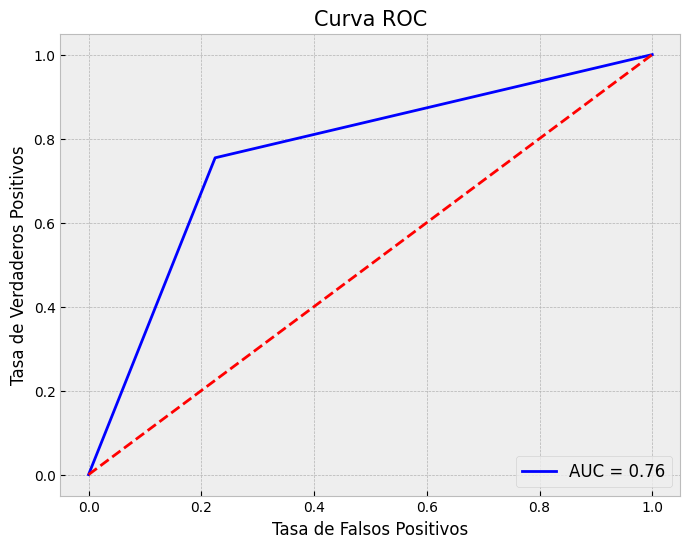

In [ ]:
#predichas o las predicciones del modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testbmn)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC', fontsize=15)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.legend(loc='lower right', prop={'size': 12})
plt.show()

**Comentario:** Con un AUC-ROC de 0.76 el modelo tiene un rendimiento aceptable; lo que siguere que tiene un nivel razonable de discriminación.

## 2. ARBOL DE DECISION

In [ ]:
clfnew = DecisionTreeClassifier(random_state=1234)


# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 15, 20,25]
}

# Perform grid search with cross-validation
grid_search_clf = GridSearchCV(clfnew, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)
grid_search_clf.fit(X_train_red, y_train_balanced)
test_score_clf = grid_search_lr.best_estimator_.score(X_train_red, y_train_balanced)

print(f"Best criterion value: {grid_search_clf.best_params_['criterion']}")
print(f"Best splitter value: {grid_search_clf.best_params_['splitter']}")
print(f"Best max_depth value: {grid_search_clf.best_params_['max_depth']}")
print(f"Best accuracy: {grid_search_clf.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best criterion value: entropy
Best splitter value: best
Best max_depth value: 25
Best accuracy: 0.7993492924398564


In [102]:
# nuevo modelo con los mejores parámetros
best_model_clfnew = DecisionTreeClassifier(criterion= 'entropy',max_depth= 25, splitter= 'best')

# Entrenar el modelo con los datos de entrenamiento
best_model_clfnew.fit(X_train_red, y_train_balanced)

# Predecir con el conjunto de prueba
y_pred_testbclf = best_model_clfnew.predict(X_test_red)

# Evaluar la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_testbclf)
print(f"Precisión en el conjunto de prueba: {accuracy_test}")

# Evaluar la precisión en el conjunto de prueba
y_train_predclfnew = best_model_clfnew.predict(X_train_red)
train_accuracy = accuracy_score(y_train_balanced, y_train_predclfnew)
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")

Precisión en el conjunto de prueba: 0.73981392364453
Precisión en el conjunto de entrenamiento: 0.995068847680788


### MATRIZ DE CONFUSION

In [106]:
confusion_matrix(y_test, y_pred_testbclf)

array([[26553,  7434],
       [ 3920,  5731]])

### REPORTE DE METRICAS

In [104]:
print(classification_report(y_true=y_test,y_pred=y_pred_testbclf))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82     33987
         1.0       0.44      0.59      0.50      9651

    accuracy                           0.74     43638
   macro avg       0.65      0.69      0.66     43638
weighted avg       0.77      0.74      0.75     43638



### CURVA ROC

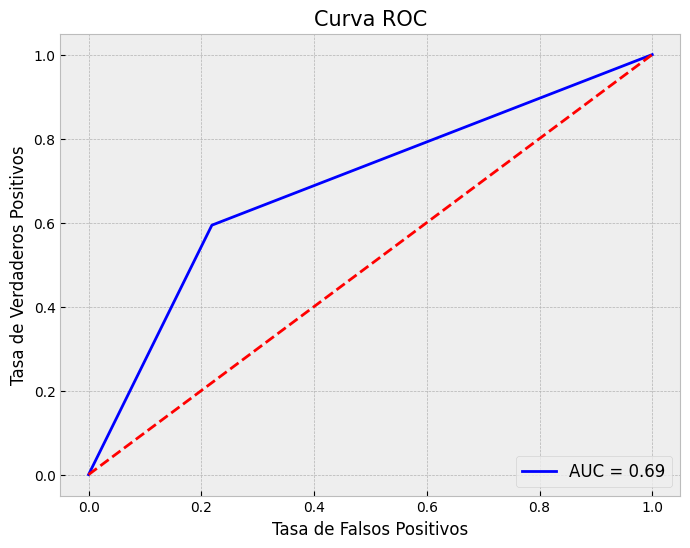

In [105]:
#predichas o las predicciones del modelo
fpr, tpr, thresholds = roc_curve(y_test, y_pred_testbclf)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Curva ROC', fontsize=15)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.legend(loc='lower right', prop={'size': 12})
plt.show()

**Comentario:** la selección de hiperparámetros no ha tenido un impacto significativo en el desempeño del modelo. La precisión y las otras métricas son bastante similares antes y después de la selección de hiperparámetros. Es útil explorar otras estrategias o modelos para mejorar el rendimiento.

# **SELECCION DEL MODELO**



**Regresión Logística:**

*   Precisión en Pruebas: 0.7708 (después de ajustes de hiperparámetros).
*   AUC-ROC: 0.76 (después de ajustes de hiperparámetros).
*   Matriz de Confusión: [[26357, 7630], [2372, 7279]] (después de ajustes de hiperparámetros).


**Árbol de Decisión:**

*   Precisión en Pruebas: 0.7398 (después de ajustes de hiperparámetros).
*   AUC-ROC: 0.69 (después de ajustes de hiperparámetros).
*   Matriz de Confusión: [[26553, 7434], [3920, 5731]] (después de ajustes de hiperparámetros).


**Consideraciones:**

1.  Precisión en Pruebas: La regresión logística tiene una precisión ligeramente más alta en las pruebas después de la selección de hiperparámetros.
2.  AUC-ROC: La regresión logística también tiene un AUC-ROC más alto, lo cual es un indicador importante de la capacidad del modelo para distinguir entre clases.
3.  Matriz de Confusión: Ambos modelos parecen tener dificultades en la clasificación de la clase positiva, pero la regresión logística tiene menos falsos positivos.


**Recomendación:**

De los dos modelos considerados para este proyecto, La regresión logística tiene un rendimiento y desempeno ligeramente mejor que el arbol de desicion. Sin embrgo, es importante probar con más modelos y técnicas de ajuste de hiperparámetros para obtener una evaluación más completa.